# In this notebook, we will investigate the characteristics of npn high voltage from ST technology 

---------------------------------------------- 
$$ Specification $$
Model name: NPN high voltage 

$E_l = 1 \mu m$

$E_w = 0.27 \mu m$

-------------------------------------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

## 1. keep $V_{BE}$, sweep $V_{CE}$

In [2]:
# Read the CSV file into a pandas DataFrame
data = pd.read_csv('gummel_beta_vs_VCE.csv', skiprows=1, header=None) # No header

(0.0, 0.6)

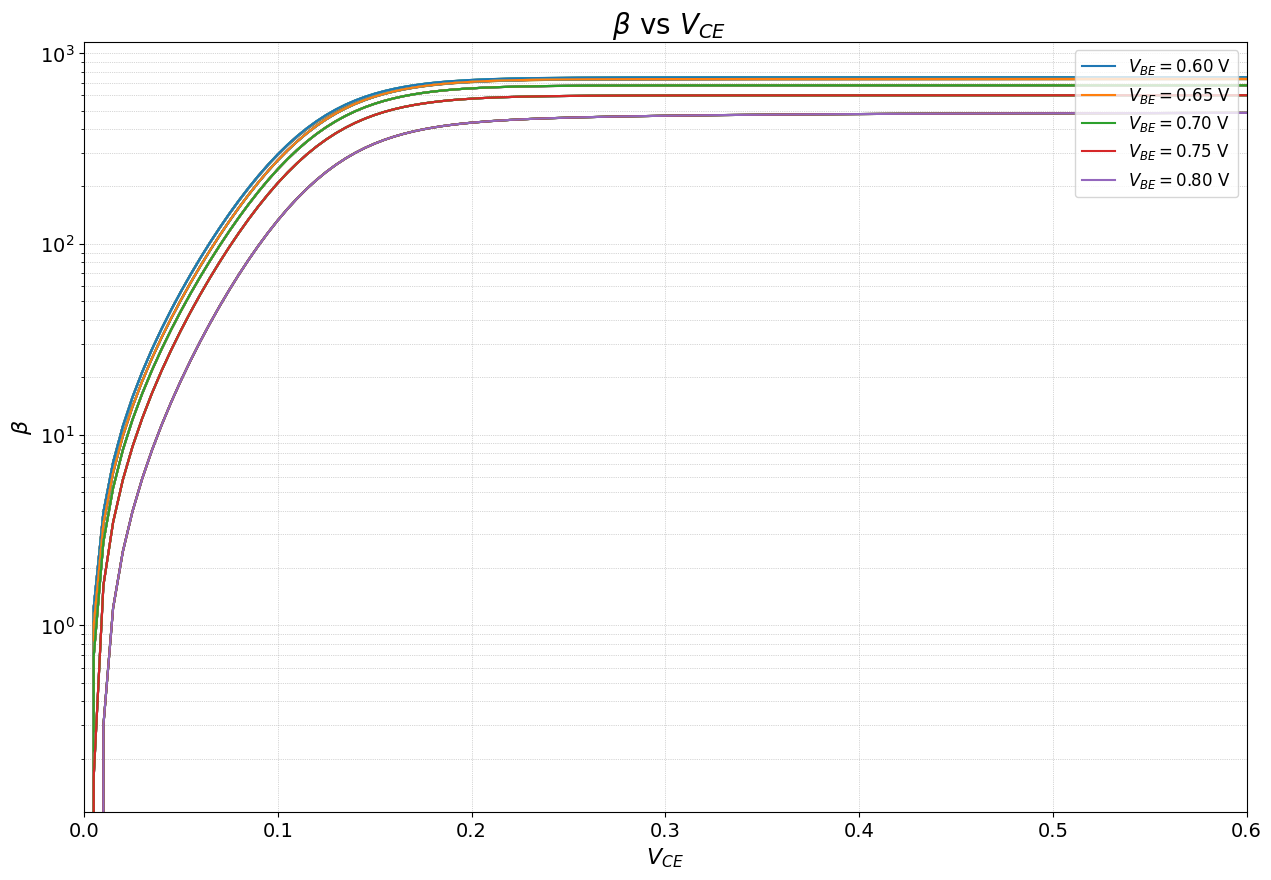

In [3]:

VBE = [0.6, 0.65, 0.7, 0.75, 0.8]
n = np.linspace(1, 10, 10)
count = 1
count = int(count)

plt.figure(figsize=(15, 10))  # Create the figure only once
plt.title(r' $\beta$ vs $V_{CE}$',fontsize = 20)
for V in VBE:
    try:
        plt.semilogy(data[0], data[count], label=f'$V_{{BE}} = {V:.2f}$ V')

        for i in range(count, count + 10):
            plt.semilogy(data[0], data[i])

    except IndexError:
        print(f"Error: Index {count} or {i} out of range for data")
        break

    count = count + 10

plt.xlabel(r'$V_{CE} $', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='upper right', fontsize=12)
plt.xlim(0,0.6)

## 2. keep $V_{CE}$, sweep $V_{BE}$

In [4]:
# Read the CSV file into a pandas DataFrame
data2 = pd.read_csv('gummel_beta_vs_VBE.csv', skiprows=1, header=None) # No header

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_25872/1107300345.py:27: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1e3)


(5.67106559144008, 1000.0)

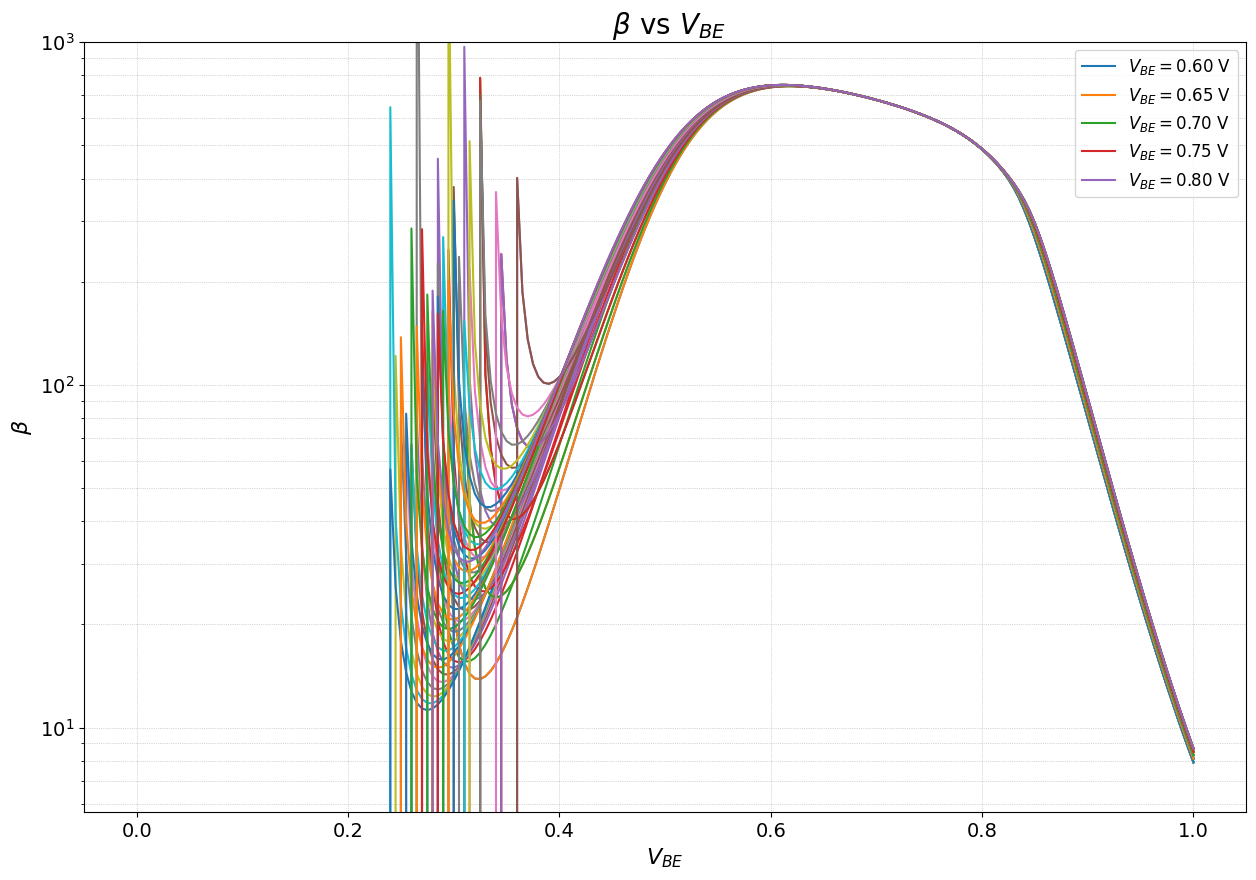

In [5]:

VCE = [0.6, 0.65, 0.7, 0.75, 0.8]
n = np.linspace(1, 10, 10)
count = 1
count = int(count)

plt.figure(figsize=(15, 10))  # Create the figure only once
plt.title(r' $\beta$ vs $V_{BE}$',fontsize = 20)
for V in VCE:
    try:
        plt.semilogy(data2[0], data2[count], label=f'$V_{{BE}} = {V:.2f}$ V')

        for i in range(count, count + 10):
            plt.semilogy(data2[0], data2[i])

    except IndexError:
        print(f"Error: Index {count} or {i} out of range for data")
        break

    count = count + 10

plt.xlabel(r'$V_{BE} $', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='upper right', fontsize=12)
plt.ylim(0,1e3)

## 3. Set $V_{BE} = V_{CE}$

In [6]:
data3 = pd.read_csv('IcIb_bellshape.csv', skiprows=1, header=None) # No header

In [7]:
#group of Ic
gr_Ic = np.arange(1,21,1)
Ic = data3[gr_Ic]

gr_Ib = np.arange(21,41,1)
print(gr_Ib)
Ib = data3[gr_Ib]
beta = []

for i in range(20):
    beta.append(data3[gr_Ic[i]] / data3[gr_Ib[i]])

VBE = [0.6,0.65,0.7,0.75,0.8]
n = np.linspace(1,20,20)
# plt.plot(beta)
# plt.show()

[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_25872/795322686.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize=12)


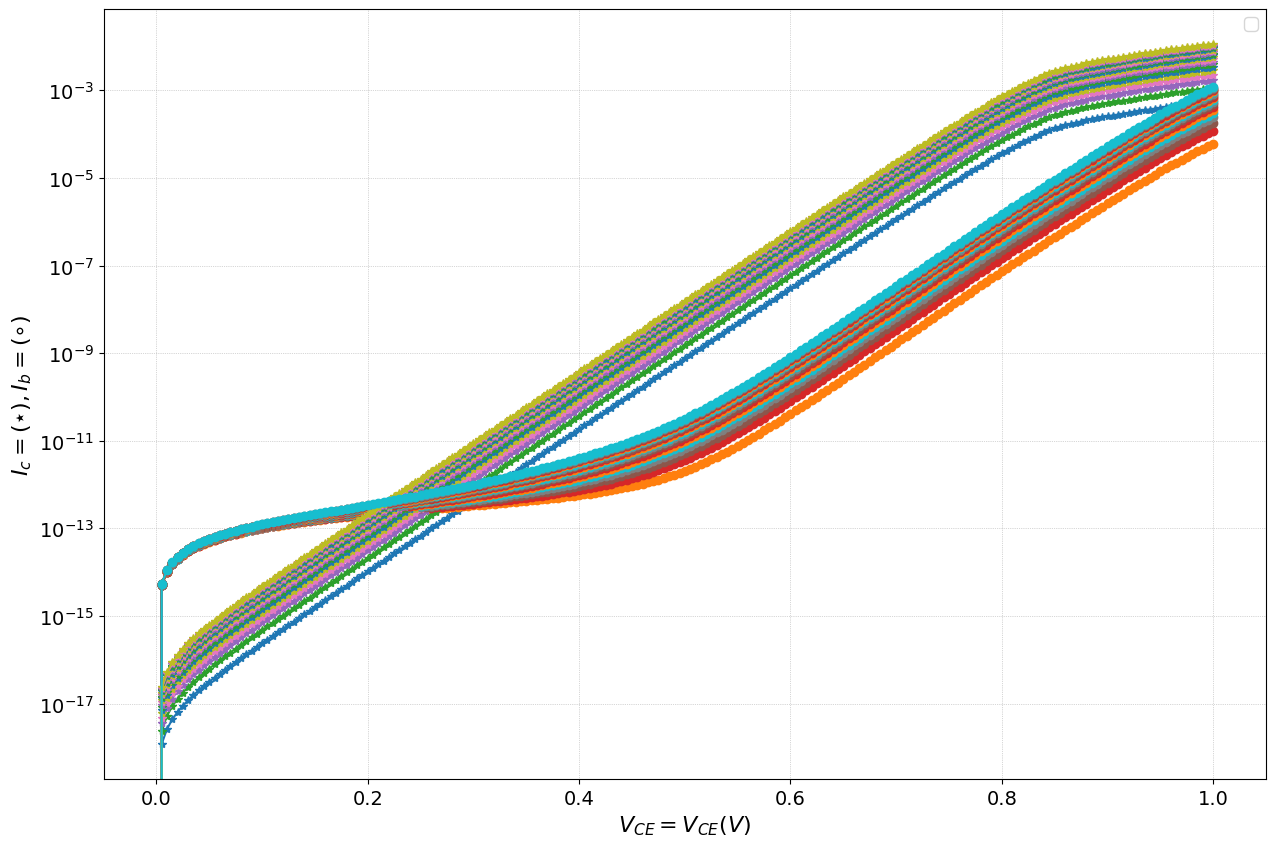

In [8]:
plt.figure(figsize = (15,10))
for i in range(20):
    plt.semilogy(data3[0], data3[gr_Ic[i]], marker = '*')#, label = f' m = {n[i]}' )
    plt.semilogy(data3[0], data3[gr_Ib[i]], marker = 'o')
plt.ylabel(r'$I_c = (\star),  I_b = (\circ$)', fontsize=16)
plt.xlabel(r'$V_{CE} = V_{CE} (V)$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='upper right', fontsize=12)

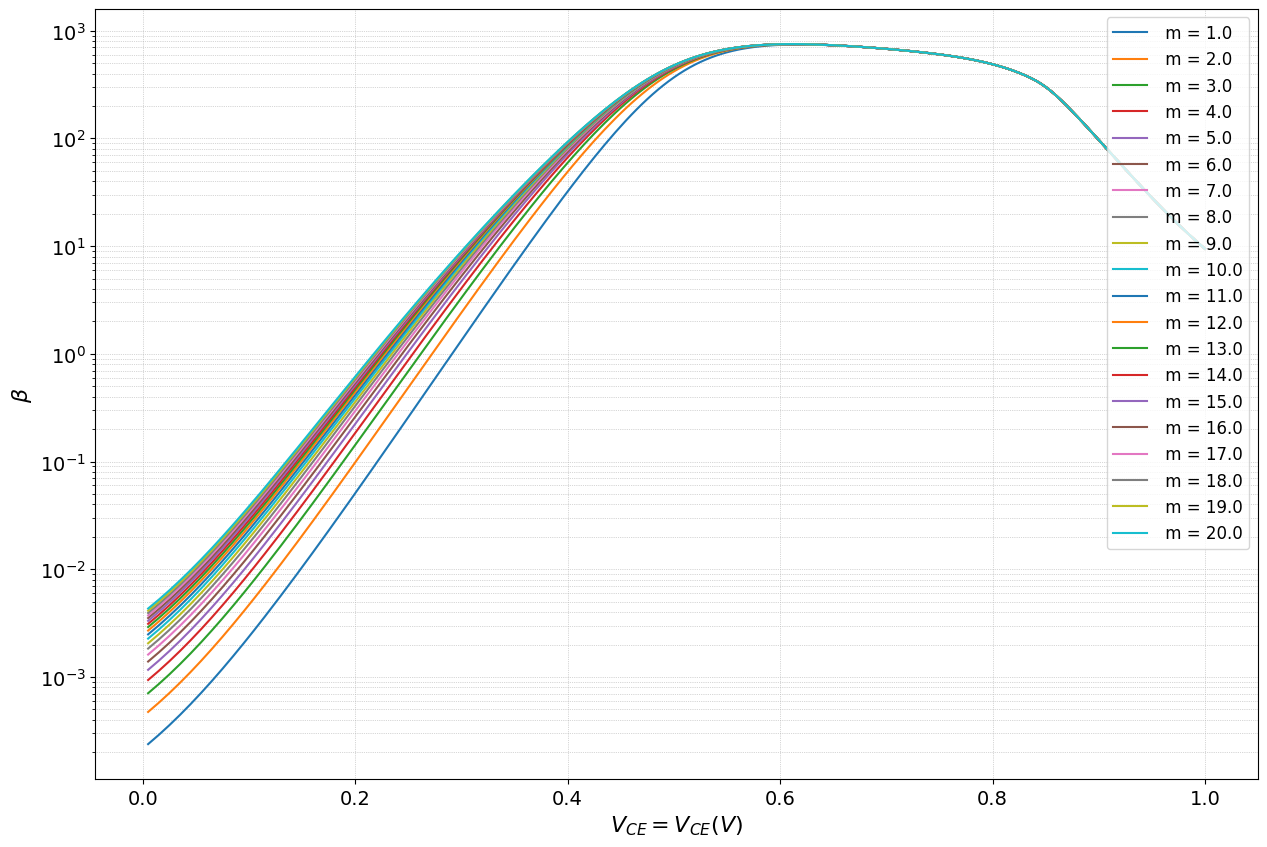

In [9]:
plt.figure(figsize = (15,10))
for i in range(20):
    plt.semilogy(data3[0], beta[i], label = f' m = {n[i]}' )
plt.xlabel(r'$V_{CE} = V_{CE} (V)$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='upper right', fontsize=12)
# plt.xlim(0,2)

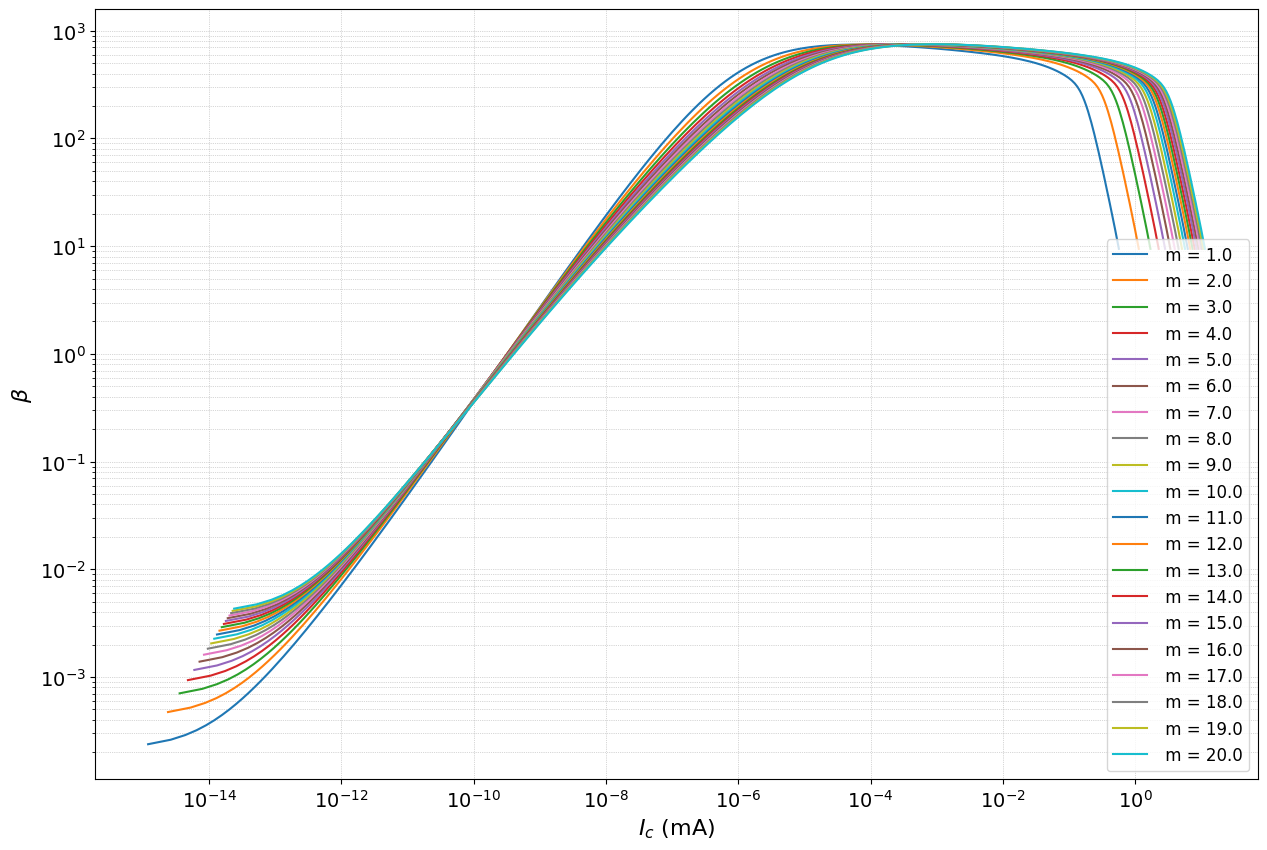

In [10]:
plt.figure(figsize = (15,10))
for i in range(20):
    plt.loglog(data3[gr_Ic[i]]*1e3, beta[i], label = f' m = {n[i]}' )
plt.xlabel(r'$I_c$ (mA)', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
# plt.xlim(0,2)

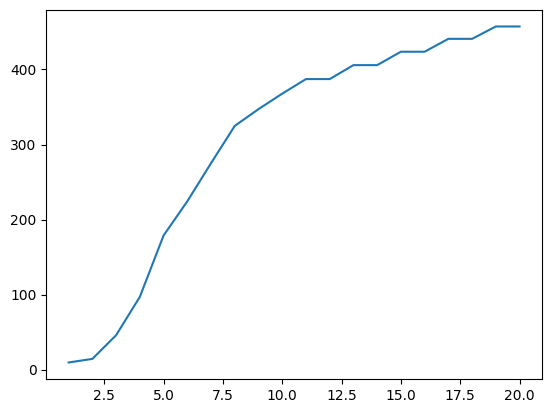

In [11]:
import numpy as np

def find_closest_index(array, value):
  """
  Finds the index of the number in an array that is closest to a given value.

  Args:
    array: The array to search in.
    value: The value to find the closest match to.

  Returns:
    The index of the closest number in the array.
  """
  array = np.asarray(array)  # Convert to NumPy array for easier calculations
  index = (np.abs(array - value)).argmin()
  return index


# Example usage
beta_1mA = []
ind = []
value = 1e-3
for i in range(20):
    # plt.loglog(data3[gr_Ic[i]]*1e3, beta[i], label = f' m = {n[i]}' )
    ind = find_closest_index(data3[gr_Ic[i]], value)
    beta_1mA.append(beta[i][ind])

plt.plot(n, beta_1mA)

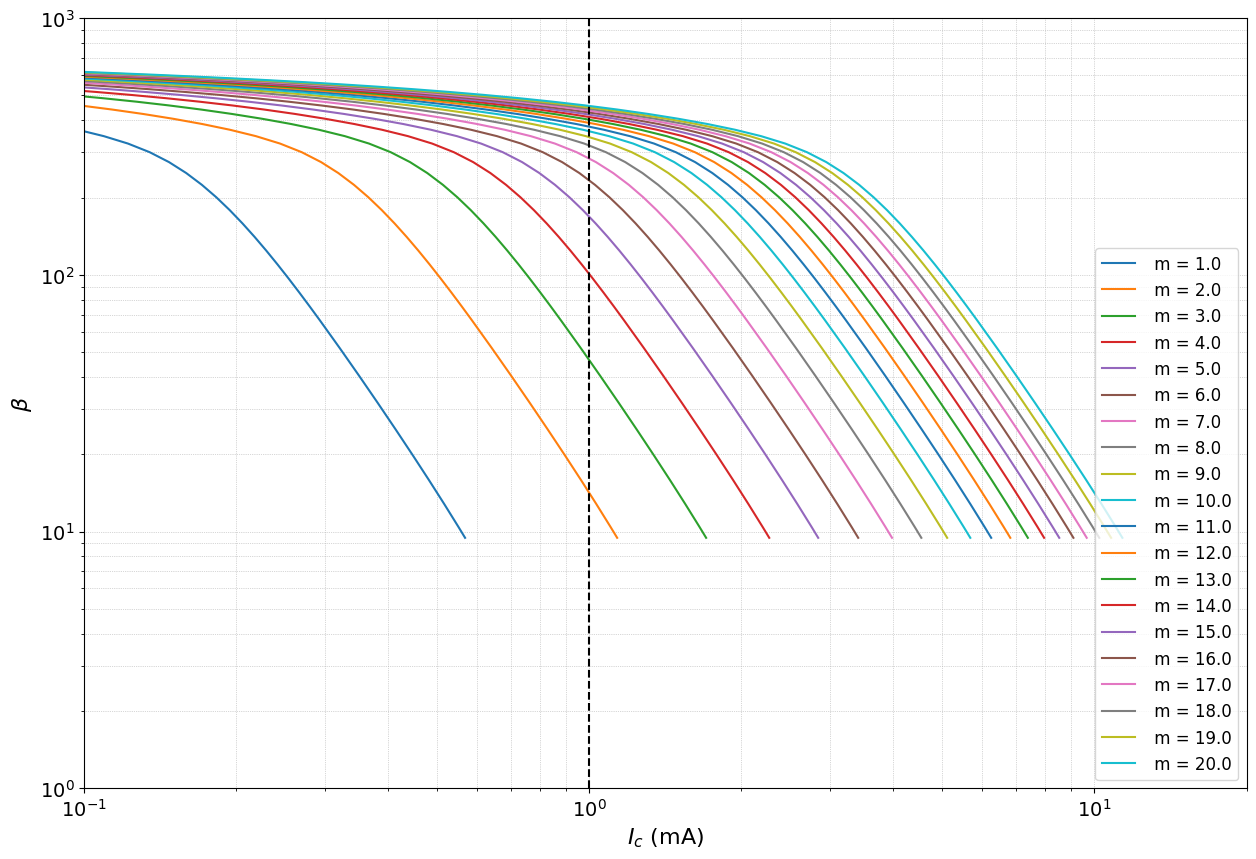

In [12]:
plt.figure(figsize = (15,10))
for i in range(20):
    plt.loglog(data3[gr_Ic[i]]*1e3, beta[i], label = f' m = {n[i]}' )
plt.xlabel(r'$I_c$ (mA)', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.xlim(1e-1, 20)
plt.ylim(1,1e3)
plt.axvline(x = 1, color = 'black', linestyle ='dashed')

## 4. Noise plot 

In [13]:
data4 = pd.read_csv('current_mirror_noise_number_sweep.csv', skiprows=1, header=None) # No header

(1, 5)

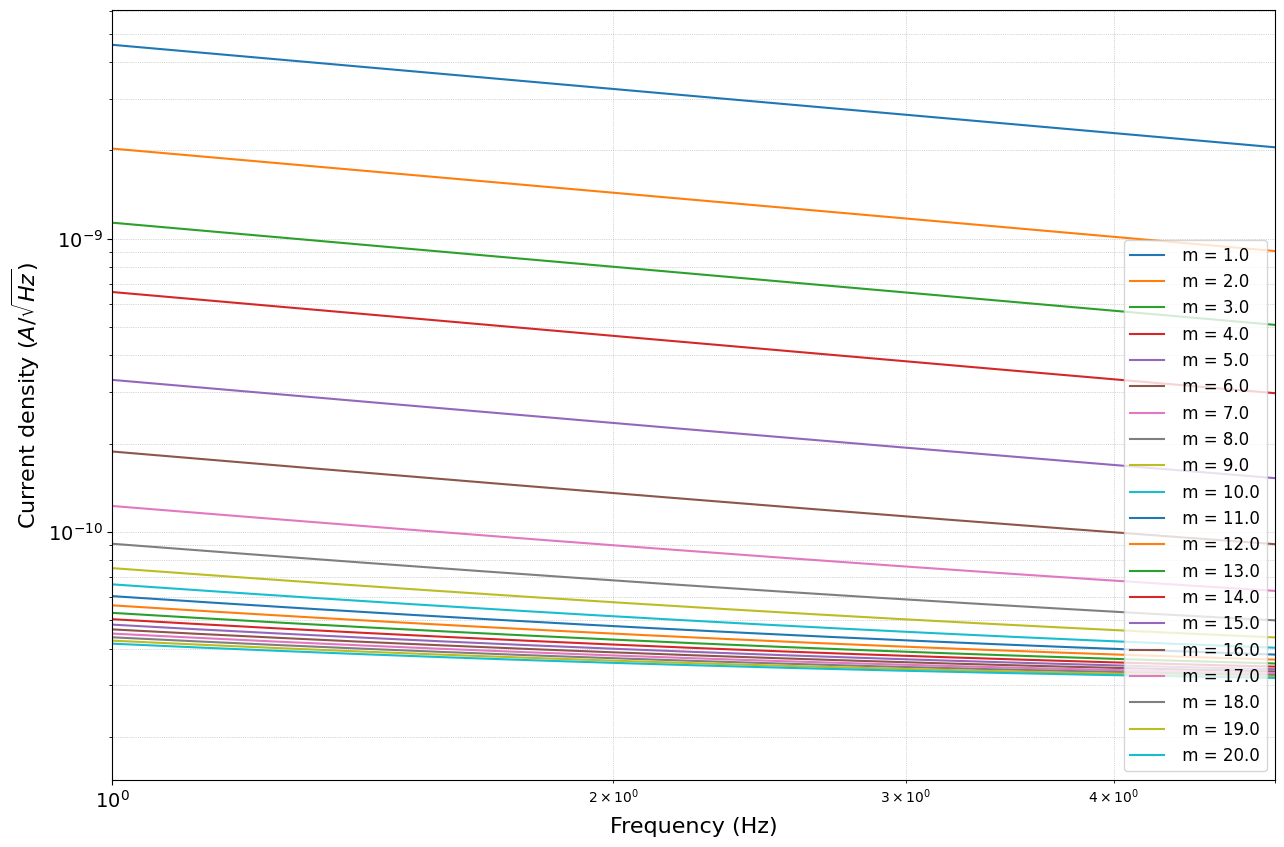

In [14]:
noise_1Hz = []
plt.figure(figsize = (15,10))
for i in range(20):
    plt.loglog(data4[0], data4[i+1], label = f' m = {n[i]}' )
    noise_1Hz.append(data4[i+1][0])
plt.xlabel(r'Frequency (Hz)', fontsize=16)
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.xlim(1,5)

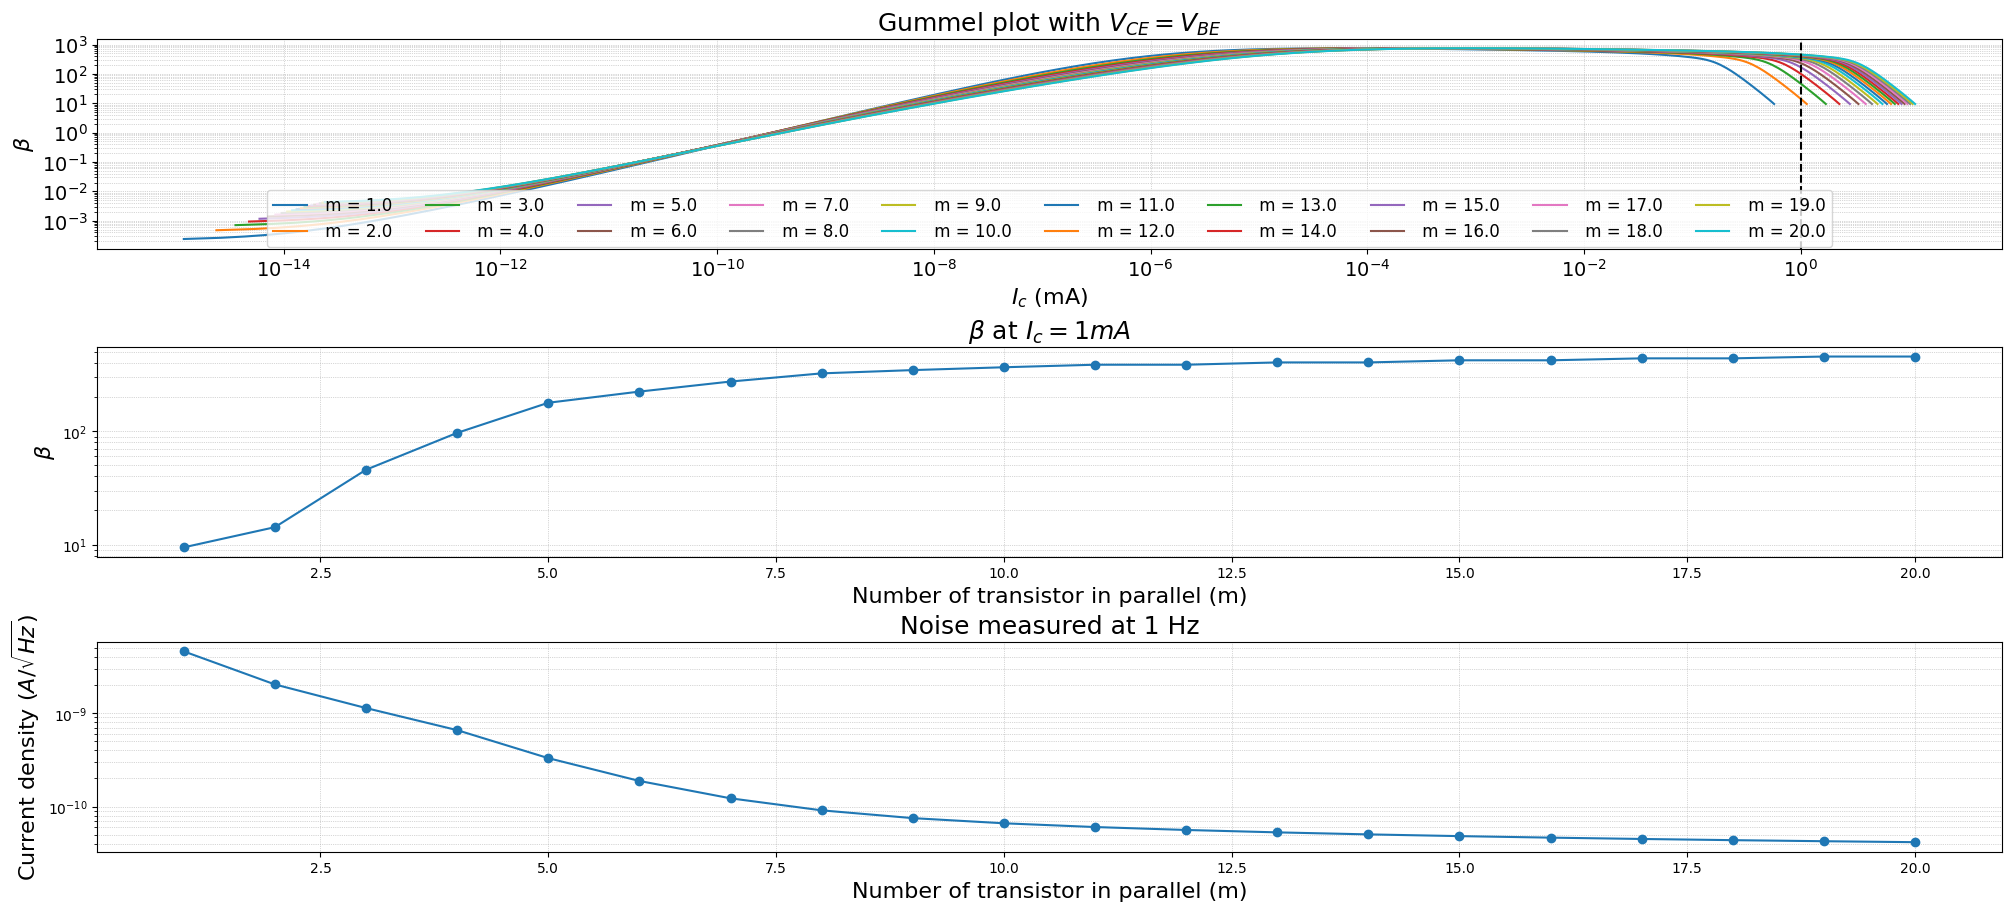

In [15]:
plt.figure(figsize = (20,9), constrained_layout=True)
plt.subplot(311)
plt.gca().set_title(r'Gummel plot with $V_{CE} = V_{BE}$',fontsize = 18)
for i in range(20):
    plt.loglog(data3[gr_Ic[i]]*1e3, beta[i], label = f' m = {n[i]}' )
plt.xlabel(r'$I_c$ (mA)', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
# plt.legend(loc='lower right', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.32), ncol=10, fontsize=12) 
# plt.xlim(1e-1, 20)
# plt.ylim(1,1e3)
plt.axvline(x = 1, color = 'black', linestyle ='dashed')
plt.subplot(312)
plt.gca().set_title(r'$\beta$ at $I_c = 1mA$',fontsize = 18)
plt.semilogy(n, beta_1mA, marker ='o')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.subplot(313)
plt.gca().set_title('Noise measured at 1 Hz',fontsize = 18)
plt.semilogy(n, noise_1Hz, marker ='o')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.savefig('gummel_et_noise.png')

In [16]:
def chi_square(observed, expected):
  """
  Calculates the chi-square statistic.

  Args:
    observed: Array of observed frequencies.
    expected: Array of expected frequencies.

  Returns:
    The chi-square statistic.
  """
  observed = np.asarray(observed)
  expected = np.asarray(expected)

  # Calculate the chi-square statistic
  chi2 = np.sum((observed - expected)**2 / expected)  
  return chi2

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_25872/1838743379.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(objective, n[n_c:20], noise_to_plot)
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_25872/1838743379.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(objective1, n[n_c:20], noise_to_plot)


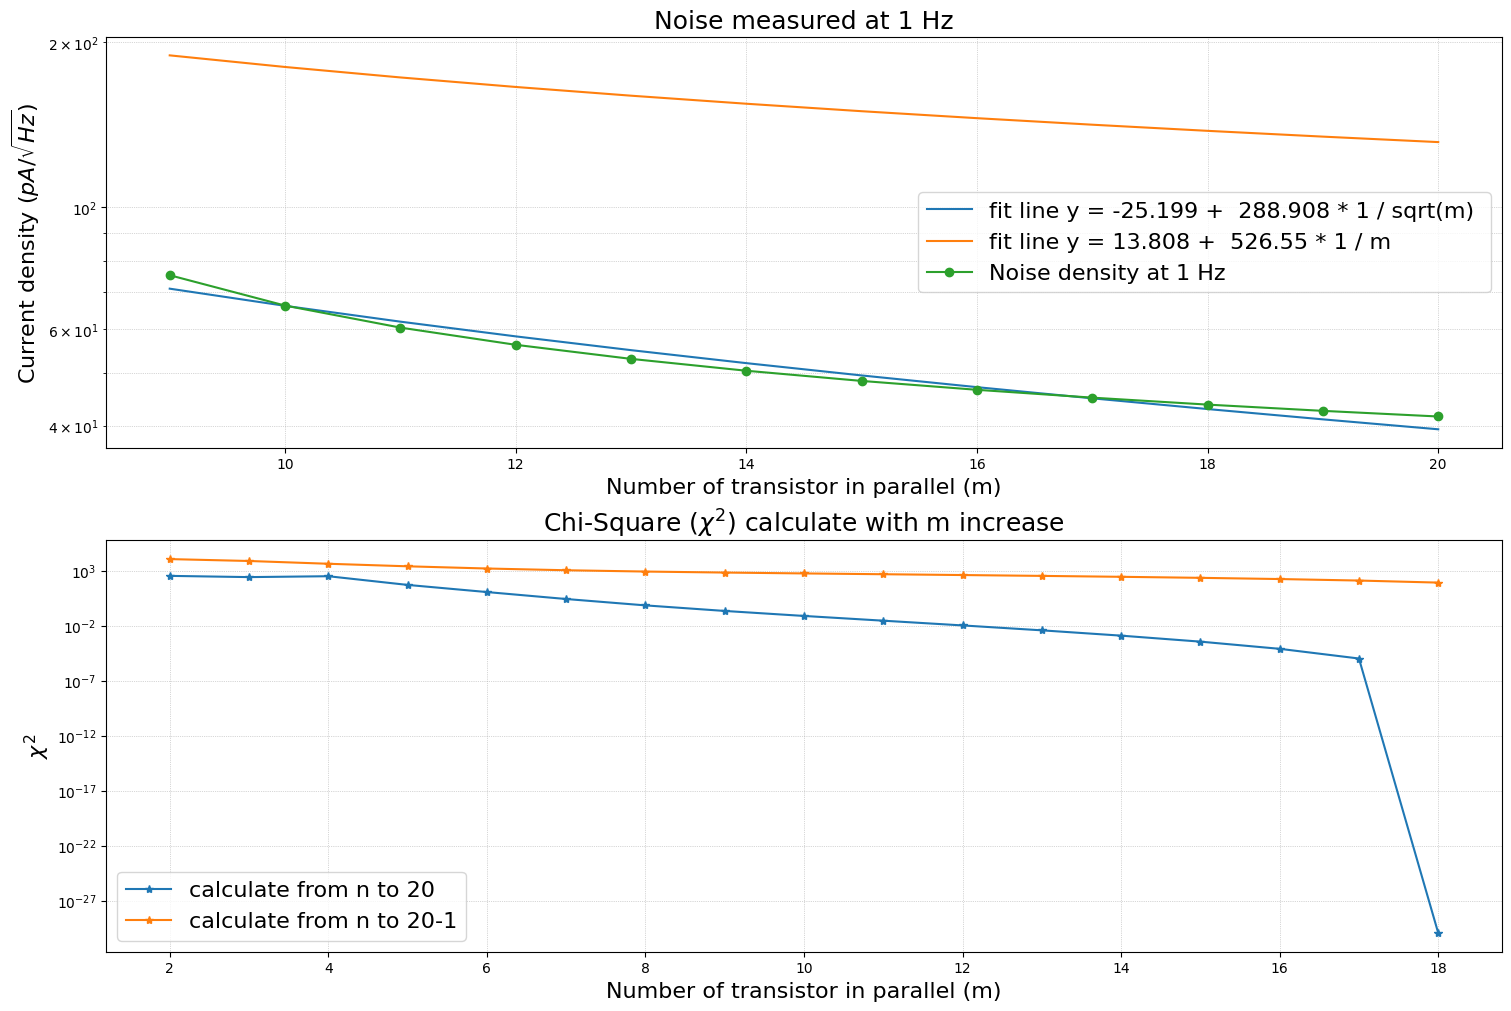

In [17]:
from scipy.optimize import curve_fit
def objective(x,a,b):
    return a + b * (1 / np.sqrt(x))
def objective1(x,a,b):
    return a + b * (1 / (x))
plt.figure(figsize = (15,10), constrained_layout=True)
n1 = 8
noise_to_plot = noise_1Hz[n1:20]
noise_to_plot = np.array(noise_to_plot)*1e12
plt.subplot(211)

# fit curve
popt, _ = curve_fit(objective, n[n1:20], noise_to_plot)
a, b = popt
plt.semilogy(n[n1:20], objective(n[n1:20], a, b), label = f'fit line y = {np.round(a,3)} +  {np.round(b,3)} * 1 / sqrt(m) ')
popt, _ = curve_fit(objective1, n[n1:20], noise_to_plot)
a, b = popt
plt.semilogy(n[n1:20], objective(n[n1:20], a, b), label = f'fit line y = {np.round(a,3)} +  {np.round(b,3)} * 1 / m ')

plt.gca().set_title('Noise measured at 1 Hz',fontsize = 18)
plt.semilogy(n[n1:20], noise_to_plot, marker ='o', label = 'Noise density at 1 Hz')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.legend(fontsize = 16)
# plt.savefig('gummel_et_noise.png')
# n1 = np.arange(9,20,1)
plt.subplot(212)
plt.gca().set_title(r'Chi-Square ($\chi^2$) calculate with m increase', fontsize = 18)
chi = []
chi1 =[] 
n_chi = np.arange(2,19,1)
for n_c in n_chi:
    noise_to_plot = noise_1Hz[n_c:20]
    noise_to_plot = np.array(noise_to_plot)*1e12
    popt, _ = curve_fit(objective, n[n_c:20], noise_to_plot)
    a, b = popt
    y1 = objective(n[n_c:20], a, b)
    chi.append(chi_square(noise_to_plot, y1))
    
    popt, _ = curve_fit(objective1, n[n_c:20], noise_to_plot)
    a, b = popt
    y1 = objective(n[n_c:20], a, b)
    chi1.append(chi_square(noise_to_plot, y1))
plt.semilogy(n_chi, chi,marker = '*', label = 'calculate from n to 20')
plt.semilogy(n_chi, chi1,marker = '*', label = 'calculate from n to 20-1')
plt.ylabel(r'$\chi^2$', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.legend(fontsize = 16)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.savefig('noise_fit.png')

In [18]:
fn = [6.16241e-11, 5.24309e-11, 4.61346e-11, 4.14338e-11, 3.77342e-11, 3.47225e-11, 3.22124e-11, 3.0083e-11, 2.8251e-11, 2.66566e-11, 2.52553e-11, 2.40134e-11]
fn = np.array(fn)*1e12

[ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]


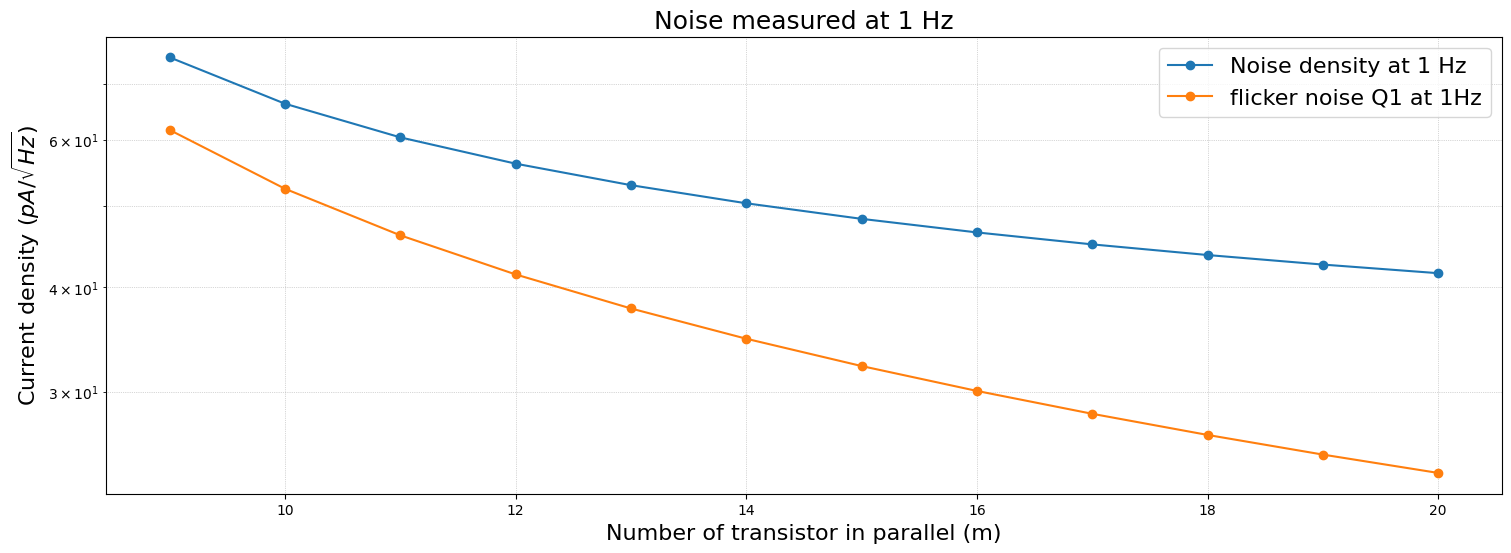

In [19]:
plt.figure(figsize = (15,10), constrained_layout=True)
n1 = 8
noise_to_plot = noise_1Hz[n1:20]
noise_to_plot = np.array(noise_to_plot)*1e12
plt.subplot(211)

# # fit curve
# popt, _ = curve_fit(objective, n[n1:20], noise_to_plot)
# a, b = popt
# plt.semilogy(n[n1:20], objective(n[n1:20], a, b), label = f'fit line y = {np.round(a,3)} +  {np.round(b,3)} * 1 / sqrt(m) ')
# popt, _ = curve_fit(objective1, n[n1:20], noise_to_plot)
# a, b = popt
# plt.semilogy(n[n1:20], objective(n[n1:20], a, b), label = f'fit line y = {np.round(a,3)} +  {np.round(b,3)} * 1 / m ')
print(n[n1:20])
plt.gca().set_title('Noise measured at 1 Hz',fontsize = 18)
plt.semilogy(n[n1:20], noise_to_plot, marker ='o', label = 'Noise density at 1 Hz')
plt.semilogy(n[n1:20], fn, marker ='o', label = 'flicker noise Q1 at 1Hz')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.legend(fontsize = 16)

In [20]:
# plt.figure(figsize = (15,10), constrained_layout=True)
# n1 = 8
# noise_to_plot = noise_1Hz[n1:20]
# noise_to_plot = np.array(noise_to_plot)*1e12
# noise_to_plot = fn
# plt.subplot(211)

# # fit curve
# popt, _ = curve_fit(objective, n[n1:20], noise_to_plot)
# a, b = popt
# plt.semilogy(n[n1:20], objective(n[n1:20], a, b), label = f'fit line y = {np.round(a,3)} +  {np.round(b,3)} * 1 / sqrt(m) ')
# popt, _ = curve_fit(objective1, n[n1:20], noise_to_plot, p0 = [n1])
# a, b = popt
# plt.semilogy(n[n1:20], objective(n[n1:20], a, b), label = f'fit line y = {np.round(a,3)} +  {np.round(b,3)} * 1 / m ')

# plt.gca().set_title('Noise measured at 1 Hz',fontsize = 18)
# plt.semilogy(n[n1:20], noise_to_plot, marker ='o', label = 'Noise density at 1 Hz')
# plt.grid(which='both', linestyle=':', linewidth='0.5')
# plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
# plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
# plt.legend(fontsize = 16)
# # plt.savefig('gummel_et_noise.png')
# # n1 = np.arange(9,20,1)
# # plt.subplot(212)
# # plt.gca().set_title(r'Chi-Square ($\chi^2$) calculate with m increase', fontsize = 18)
# # chi = []
# # chi1 =[] 
# # n_chi = np.arange(9,19,1)
# # for n_c in n_chi:
# #     noise_to_plot = fn
# #     popt, _ = curve_fit(objective, n[n_c:20], noise_to_plot)
# #     a, b = popt
# #     y1 = objective(n[n_c:20], a, b)
# #     chi.append(chi_square(noise_to_plot, y1))
    
# #     popt, _ = curve_fit(objective1, n[n_c:20], noise_to_plot)
# #     a, b = popt
# #     y1 = objective(n[n_c:20], a, b)
# #     chi1.append(chi_square(noise_to_plot, y1))
# # plt.semilogy(n_chi, chi,marker = '*', label = 'calculate from n to 20')
# # plt.semilogy(n_chi, chi1,marker = '*', label = 'calculate from n to 20-1')
# # plt.ylabel(r'$\chi^2$', fontsize=16)
# # plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
# # plt.legend(fontsize = 16)
# # plt.grid(which='both', linestyle=':', linewidth='0.5')

In [21]:
data5 = pd.read_csv('current_mirror_noise_number_sweep_withmandn.csv', skiprows=1, header=None) # No header

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


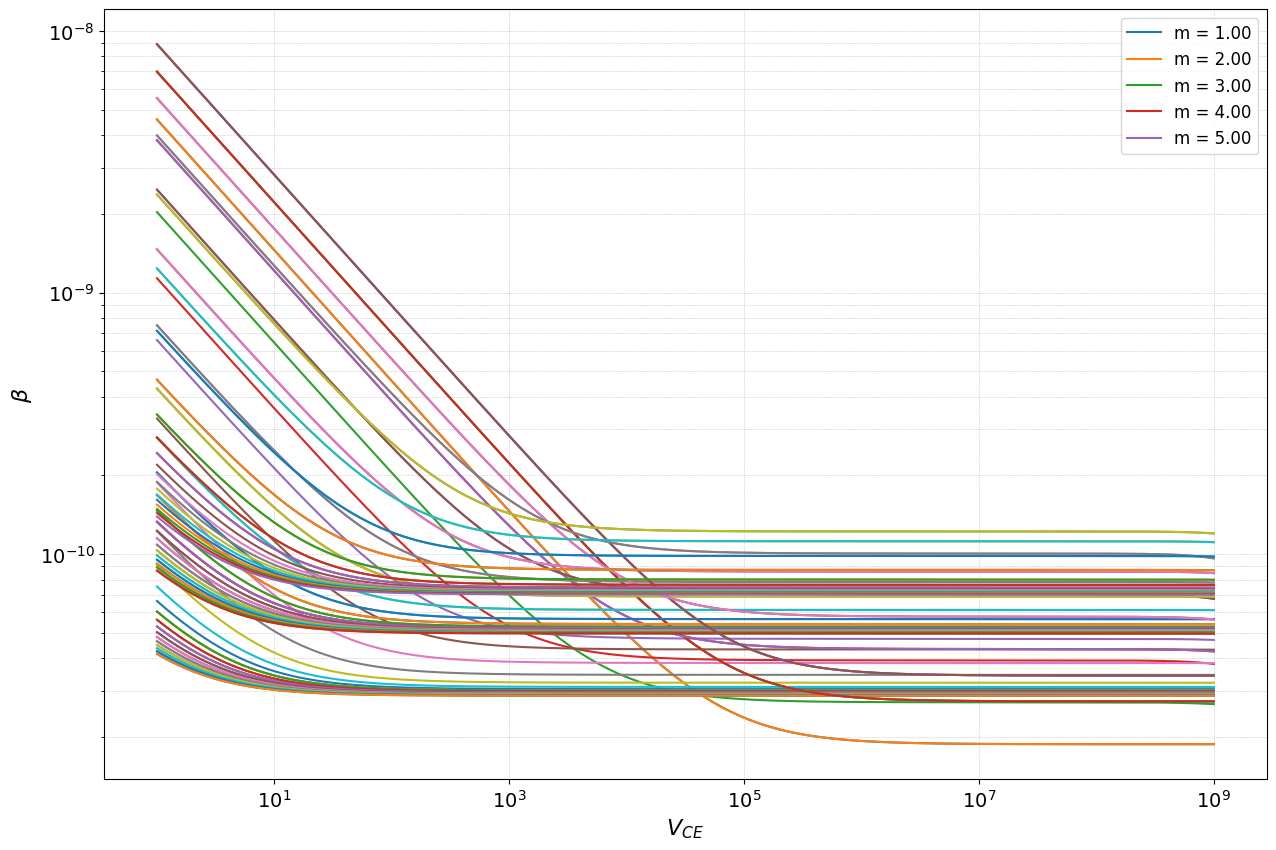

In [22]:
N = [1, 2, 3, 4, 5]
n = np.linspace(1, 20, 20)
print(n)
count = 1
count = int(count)

plt.figure(figsize=(15, 10))  # Create the figure only once
# plt.title(r' $\beta$ vs $V_{CE}$',fontsize = 20)
for i in N:
    try:
        plt.semilogy(data5[0], data5[count], label=f'm = {i:.2f}')

        for i in range(count, count + 20):
            plt.loglog(data5[0], data5[i])

    except IndexError:
        print(f"Error: Index {count5} or {i} out of range for data")
        break

    count = count + 10

plt.xlabel(r'$V_{CE} $', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='upper right', fontsize=12)


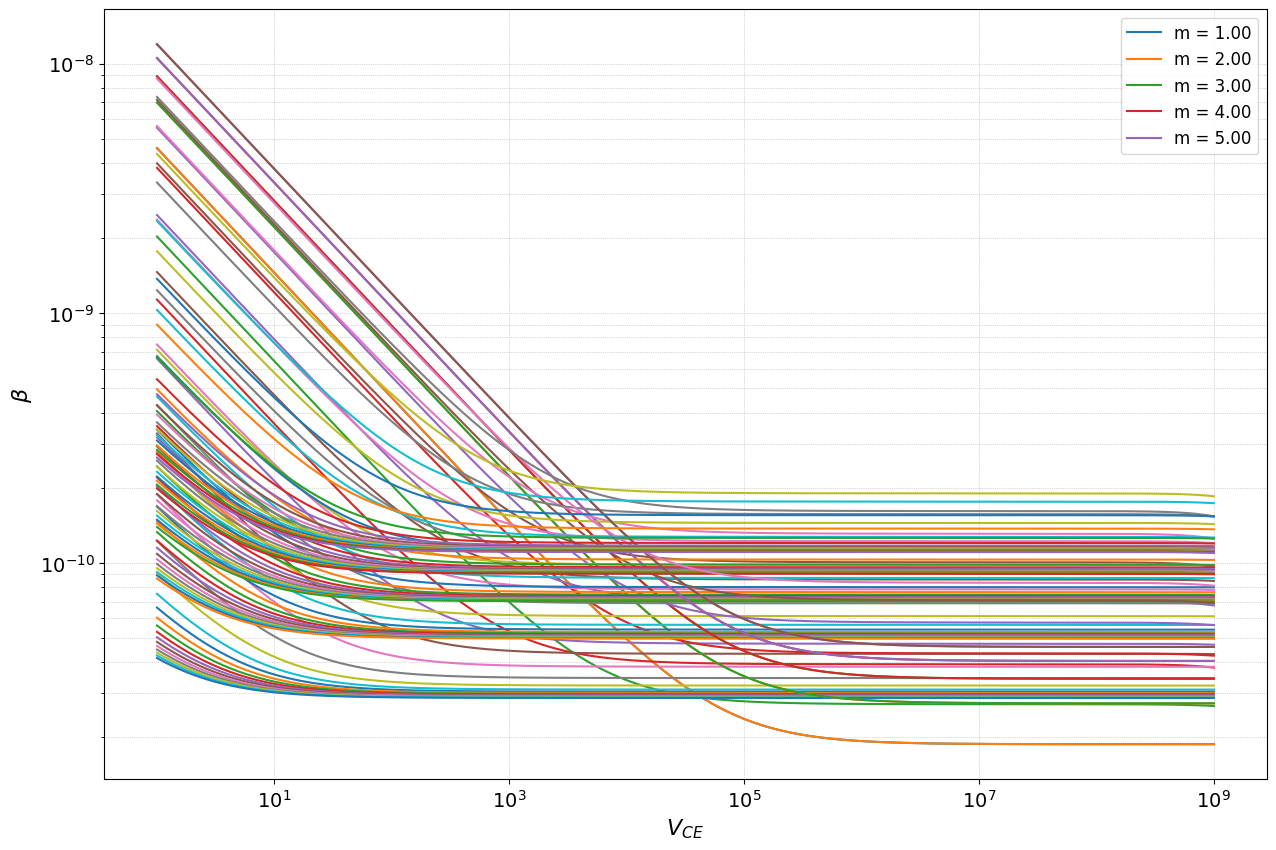

In [23]:
N = [1, 2, 3, 4, 5]
n = np.linspace(1, 20, 20)
count = 1
count = int(count)
N1 = []
N2 = []
N3 = []
N4 = []
N5 = []
N_add = [N1, N2, N3, N4, N5]

plt.figure(figsize=(15, 10))

for i in N:
    try:
        plt.semilogy(data5[0], data5[count], label=f'm = {i:.2f}')

        for j in range(count, count + 20):
            plt.loglog(data5[0], data5[j])
            N_add[i-1].append(data5[j])  # Append to the correct list based on i

    except IndexError:
        print(f"Error: Index {count} or {j} out of range for data5")
        break

    count = count + 20

plt.xlabel(r'$V_{CE} $', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='upper right', fontsize=12)


3.9289e-11
8.03702e-11
1.28142e-10
1.81758e-10
2.4053e-10
------
 N = 1
sqrt(i1**2) = 3.788383804718293e-11
sqrt(i2**2) = 3.788383804718293e-11
sqrt(i1**2 + i2**2) = 5.3575837561071974e-11
------
 N = 2
sqrt(i1**2) = 5.3575837561071974e-11
sqrt(i2**2) = 7.576767609436587e-11
sqrt(i1**2 + i2**2) = 8.471083712209392e-11
------
 N = 3
sqrt(i1**2) = 6.561673228343176e-11
sqrt(i2**2) = 1.136515141415488e-10
sqrt(i1**2 + i2**2) = 1.1979921473804346e-10
------
 N = 4
sqrt(i1**2) = 7.576767609436587e-11
sqrt(i2**2) = 1.5153535218873173e-10
sqrt(i1**2 + i2**2) = 1.561990657723283e-10
------
 N = 5
sqrt(i1**2) = 8.471083712209392e-11
sqrt(i2**2) = 1.8941919023591466e-10
sqrt(i1**2 + i2**2) = 1.9317042945237453e-10


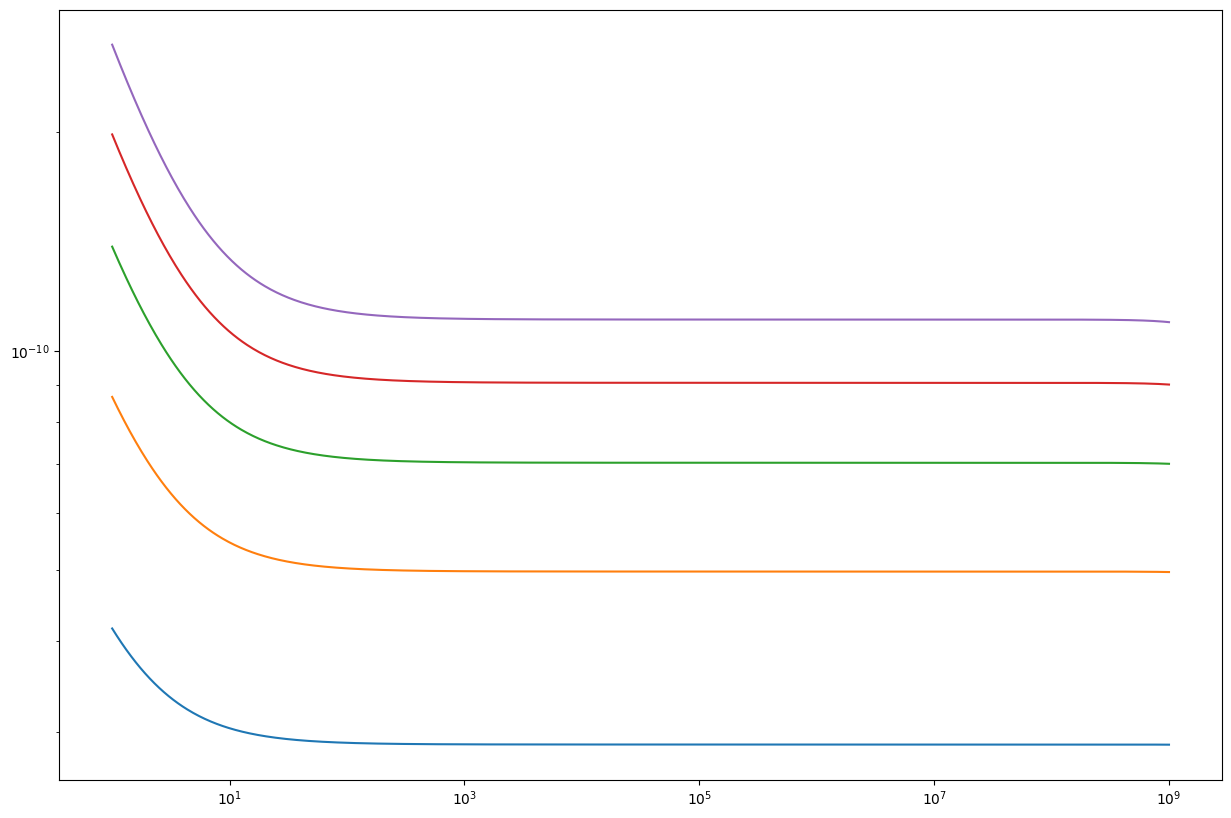

In [24]:
plt.figure(figsize = (15,10))
n = [1,2,3,4,5]
plt.loglog(data5[0], N_add[0][19])
plt.loglog(data5[0], N_add[1][19])
plt.loglog(data5[0], N_add[2][19])
plt.loglog(data5[0], N_add[3][19])
plt.loglog(data5[0], N_add[4][19])
for i in range(5):
    print(N_add[i][19][10])
KF = 6.2e-10 / 0.27
ic = 1e-3
beta = 400
for i in n:
    print('------')
    print(f' N = {i}')
    m = 10
    i1 = np.sqrt(KF * ic**2 / beta**2 *1 * 1/m)
    i2 = np.sqrt(KF * ic**2 / beta**2 *1 * i**2/m)
    print(f'sqrt(i1**2) = {i1*np.sqrt(i)}')
    print(f'sqrt(i2**2) = {i2}')
    print(f'sqrt(i1**2 + i2**2) = {np.sqrt(i1**2 + i2**2)}')

------------------------------
# DAC rationale 
------------------------------

### 1. Checking the sizing of Bipolar device with the operating point

In [218]:
bipo_current = pd.read_csv('icib_npnpnp.csv', skiprows=1, header=None) # No header
type(bipo_current)
bipo_current = bipo_current.to_numpy()
print(bipo_current.shape)

(201, 145)


In [252]:
num_bipo = np.arange(10,82,2)
VBCE = bipo_current[:,0]
Ic_npn = bipo_current[:, 1:37]
Ib_npn = bipo_current[:, 37:73]
Ic_pnp = bipo_current[:, 73:109]  
Ib_pnp = bipo_current[:, 109:145] 

1. ploting gummel plot for npn

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_25872/3862017579.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(Ic_npn[:,i]*1e3, Ic_npn[:,i]/Ib_npn[:,i], label = f' m = {num_bipo[i]}' )


(2.9, 3.1)

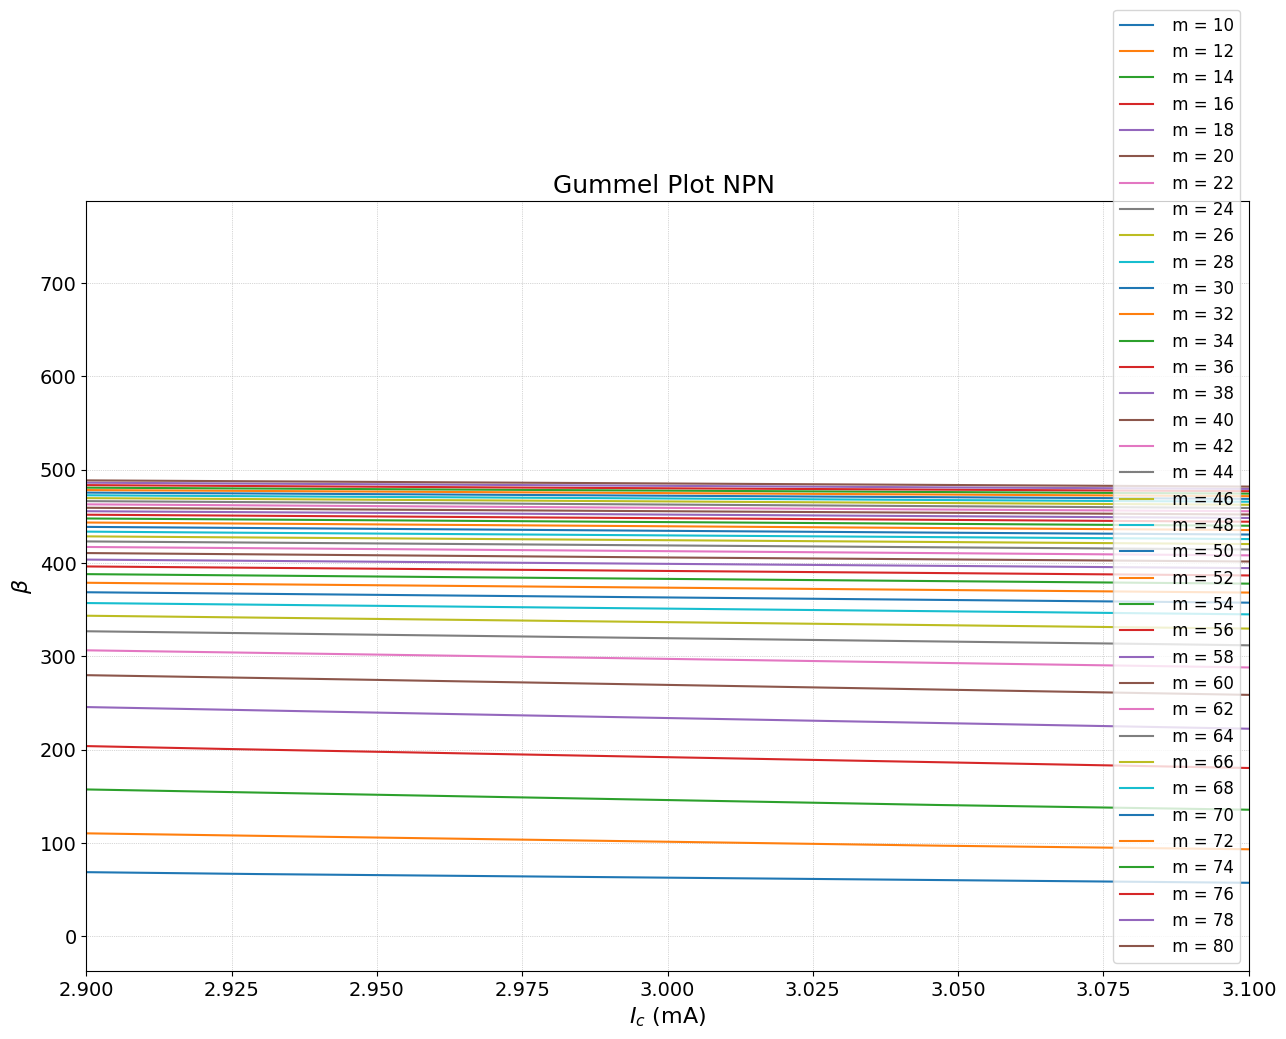

In [271]:

plt.figure(figsize = (15,10))
for i in range(len(num_bipo)):
    plt.plot(Ic_npn[:,i]*1e3, Ic_npn[:,i]/Ib_npn[:,i], label = f' m = {num_bipo[i]}' )
plt.xlabel(r'$I_c$ (mA)', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.title('Gummel Plot NPN ', fontsize = 18)
# plt.xlim(0.9,1.1)
# plt.xlim(1.9,2.1)
plt.xlim(2.9,3.1)

Plotting different beta when I = 1mA, 2 mA, 4mA

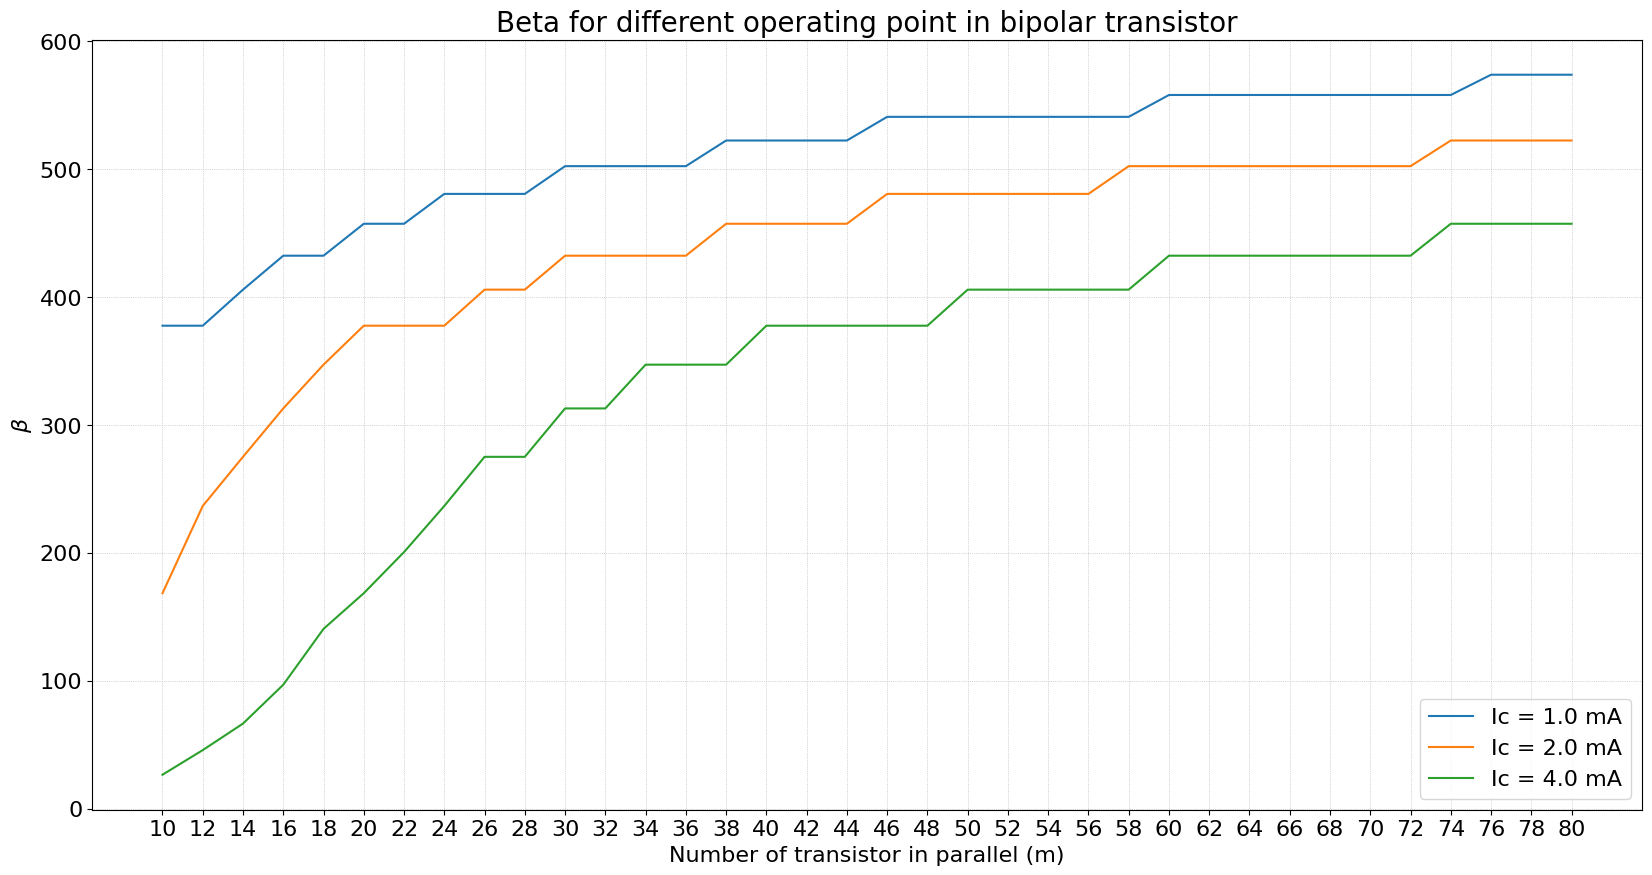

In [272]:
Ir = [1e-3, 2e-3, 4e-3]
def find_index(array, value):
    index = np.argmin(np.abs(array - value))
    return index
beta_Ir = [[],[],[]]
for i in range(len(Ir)):
    for j in range(36):
        ind = find_index(Ic_npn[:,j], Ir[i])
        # print('---------')
        # print(Ir[i])
        # print(ind)
        # print('---------')
        beta_Ir[i].append(Ic_npn[:,i][ind]/Ib_npn[:,i][ind])
plt.figure(figsize = (20,10))
for i in range(3):
    plt.plot(num_bipo, beta_Ir[i], label = f'Ic = {Ir[i] * 1e3} mA')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$\beta$', fontsize=16)
plt.xlabel('Number of transistor in parallel (m)', fontsize=16)
plt.xticks(num_bipo, fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.title('Beta for different operating point in bipolar transistor',fontsize = 20)
plt.savefig('beta_vs_npn.png')

2. Plot Gummel Plot for PNP

/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_25872/1841698931.py:3: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(np.abs(Ic_pnp[:,i])*1e3, Ic_pnp[:,i]/Ib_pnp[:,i] )
/var/folders/v4/bwhrmml56zdgg4rlt5zykqp00000gp/T/ipykernel_25872/1841698931.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize=12)


Text(0.5, 1.0, 'Gummel Plot NPN ')

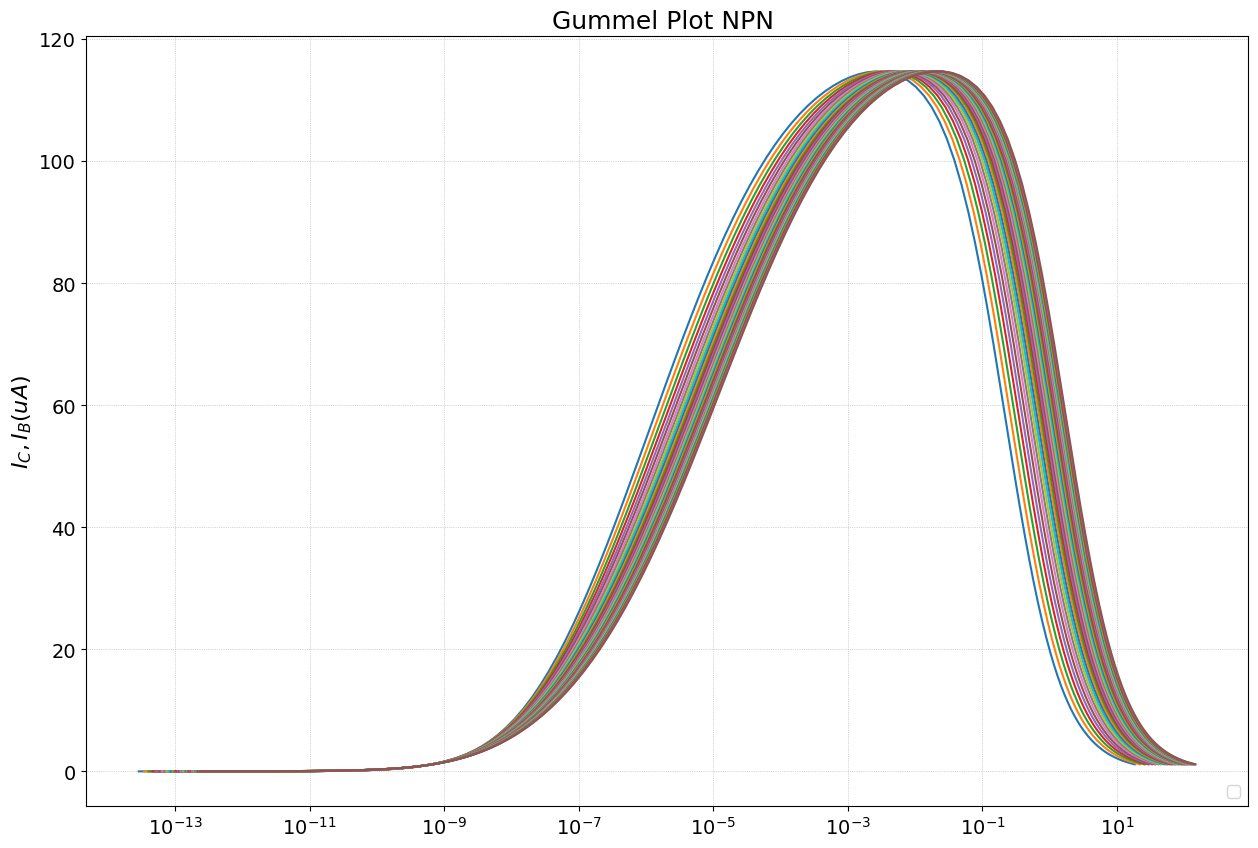

In [282]:
plt.figure(figsize = (15,10))
for i in range(len(num_bipo)):
    plt.semilogx(np.abs(Ic_pnp[:,i])*1e3, Ic_pnp[:,i]/Ib_pnp[:,i] )
    # plt.plot(Ic_pnp[:,i], 
# plt.xlabel(r'VBCE (V)', fontsize=16)
plt.ylabel(r'$I_C, I_B (uA)$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.legend(loc='lower right', fontsize=12)
plt.title('Gummel Plot NPN ', fontsize = 18)
# plt.xlim(0.6,0.8)

In [25]:
noise1 = pd.read_csv('noise1.csv', skiprows=1, header=None) # No header
noise2 = pd.read_csv('noise2.csv', skiprows=1, header=None) # No header

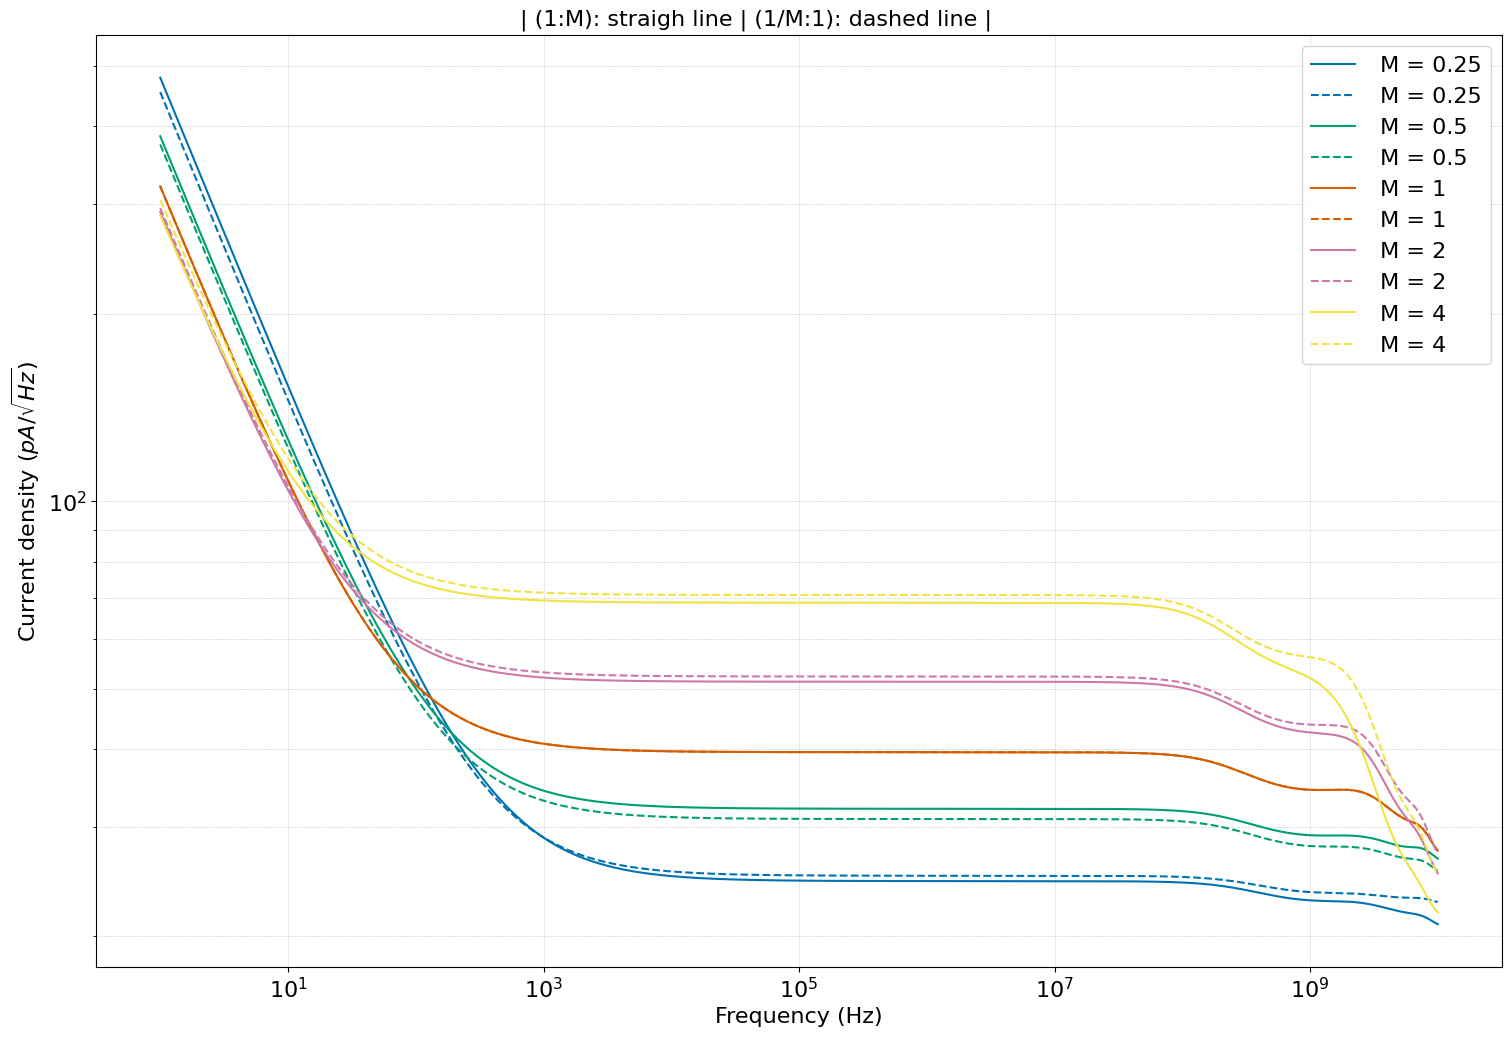

In [26]:
M = [0.25,0.5,1,2,4]
col = ["#0072B2", "#009E73", "#D55E00", "#CC79A7", "#F0E442", "#56B4E9"]
nnpn = 20
npnp = 22
El = 1
note = f'Nnpn = {nnpn}, Npnp = {npnp}, El = {El} um'
note = 'line = case 1, dashed = case 2'
plt.figure(figsize = (15,10), constrained_layout=True)

for i in range(len(M)):
    plt.loglog(noise1[0],noise1[i+1]*1e12, color = col[i], label = f' M = {M[i]}')
    plt.loglog(noise2[0],noise2[i+1]*1e12, color = col[i], linestyle = 'dashed', label = f' M = {M[i]}')

plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 1, note , ha="center", fontsize=16, va="bottom") 

plt.savefig('noise_M.png')

Text(0.5, 1.0, 'Normalized Noise Waveforms for Varying Values of M')

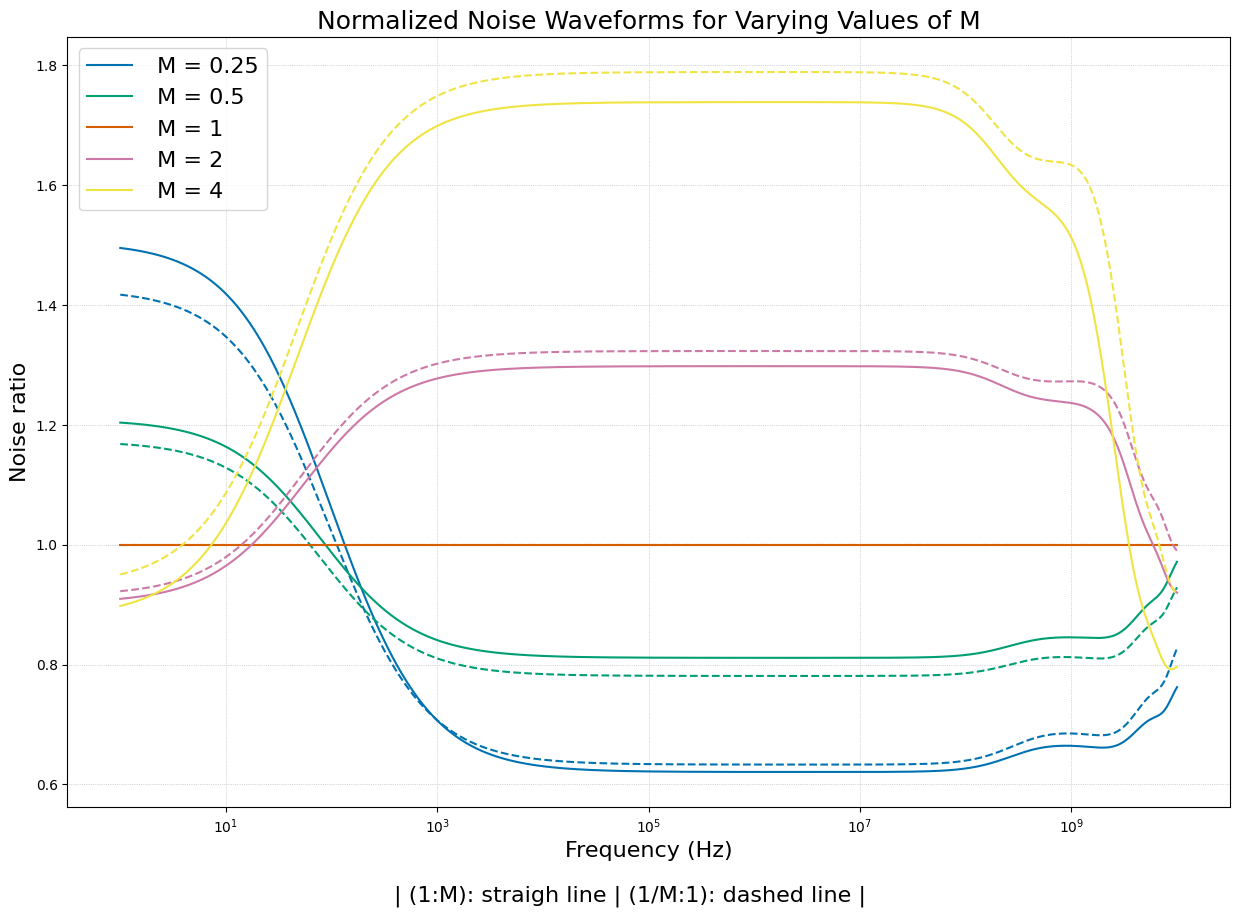

In [27]:
plt.figure(figsize = (15,10))
for i in range(len(M)):
    plt.semilogx(noise1[0],(noise1[i+1]/noise1[3]), color = col[i], label = f' M = {M[i]}')
    plt.semilogx(noise2[0],(noise2[i+1]/noise1[3]), linestyle = 'dashed', color = col[i])
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Noise ratio', fontsize=16)
plt.xlabel('Frequency (Hz)', fontsize=16)
plt.legend(fontsize = 16)
note =  '| (1:M): straigh line | (1/M:1): dashed line |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
plt.title('Normalized Noise Waveforms for Varying Values of M', fontsize = 18)
# plt.savefig('noise_ratio.png')

### varies nnpn = 8,12,16,20,24,28,32,36,40

In [283]:
noise_1 = pd.read_csv('noise1_tot.csv', skiprows=1, header=None) # No header
noise_2 = pd.read_csv('noise2_tot.csv', skiprows=1, header=None) # No header

In [284]:
# Spnp = 
# Snpn = 
# def sur_area_case1(npnp,nnpn,M):
    

In [285]:
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code to load or define 'noise_1' should be here) ...

nnpn = [8, 12, 16, 20, 24, 28, 32, 36, 40]
M = [0.25, 0.5, 1, 2, 4]
M = np.array(M)
n = np.linspace(1, 9, 9)

M1_1 = []
M2_1 = []
M3_1 = []
M4_1 = []
M5_1 = []
M_add1 = [M1_1, M2_1, M3_1, M4_1, M5_1]
M1_2 = []
M2_2 = []
M3_2 = []
M4_2 = []
M5_2 = []
M_add2 = [M1_2, M2_2, M3_2, M4_2, M5_2]

for i in range(5):
    for j in range(9):
        try:
            index = 1 + i + j * 5  # Calculate the index directly
            M_add1[i].append(noise_1[index])
            M_add2[i].append(noise_2[index])
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break


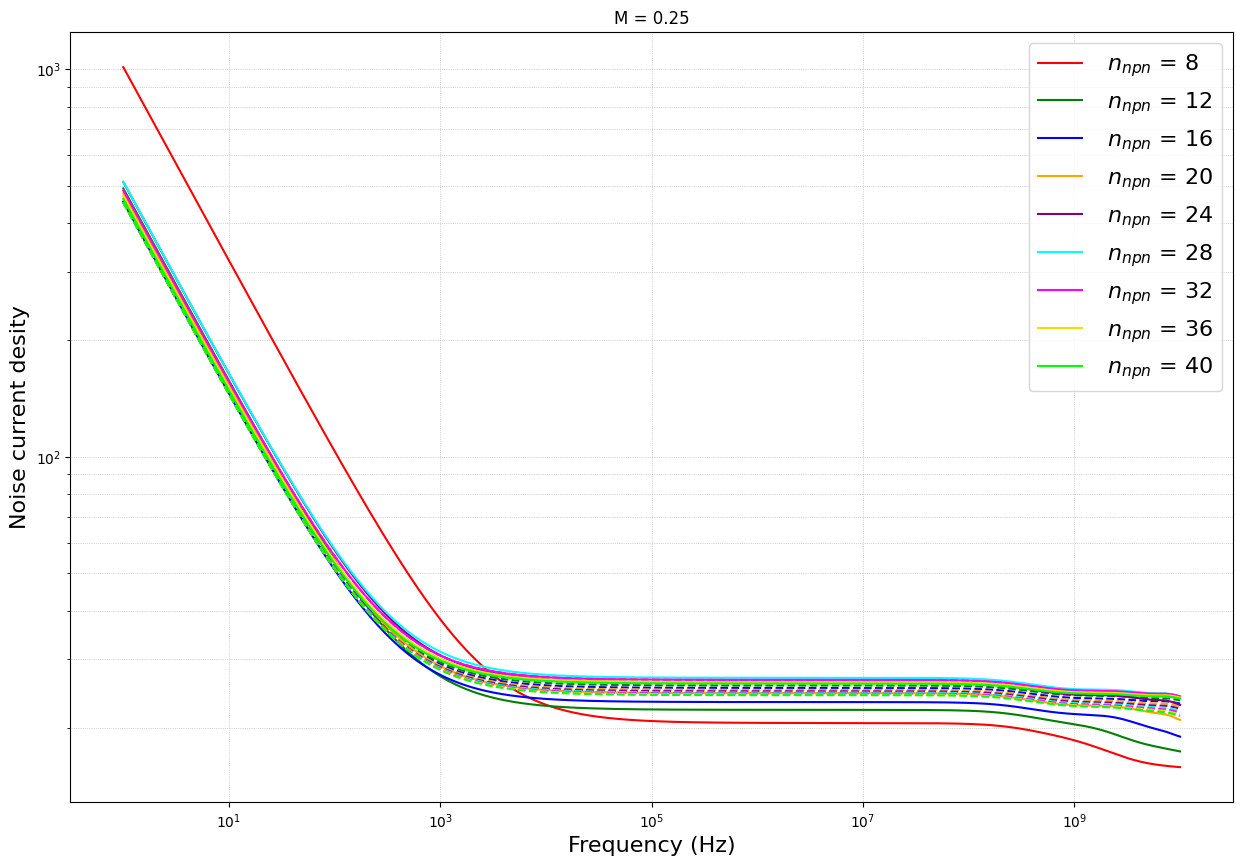

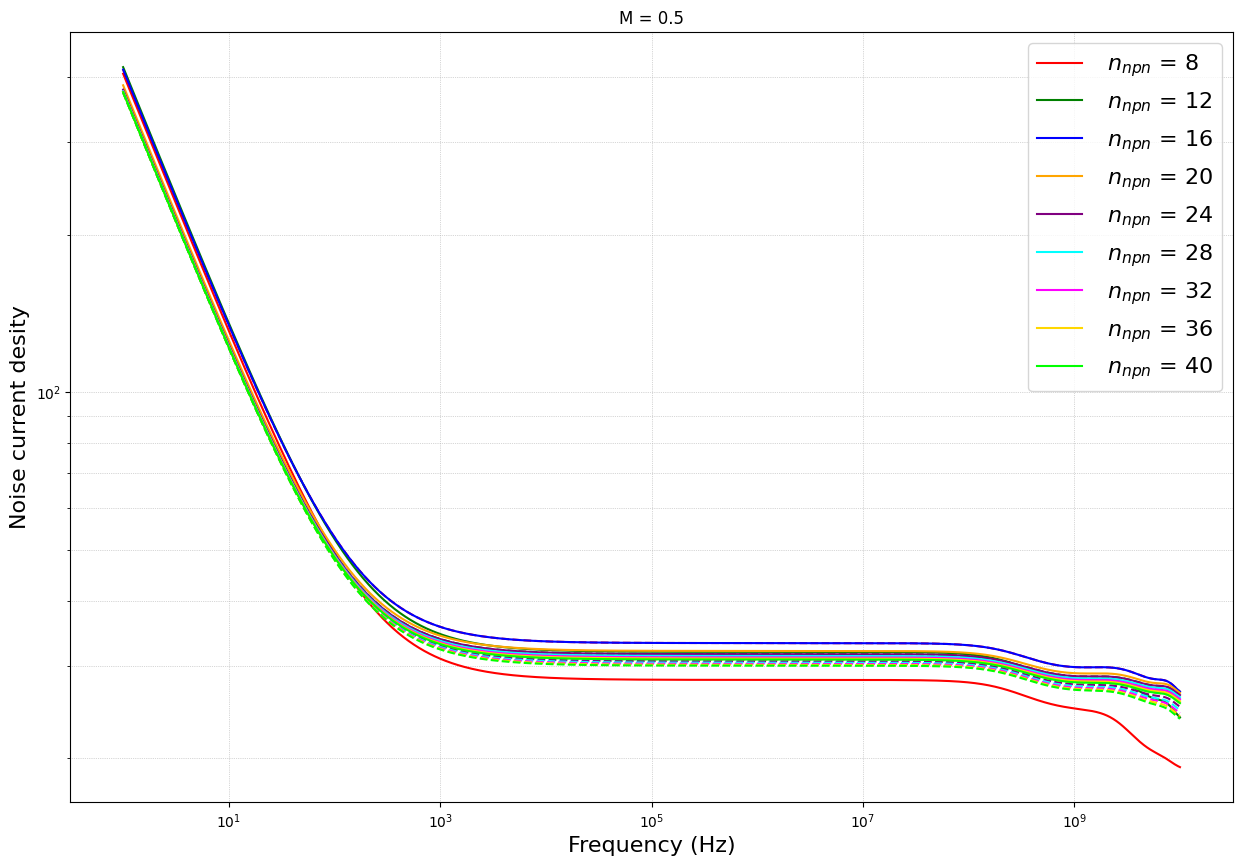

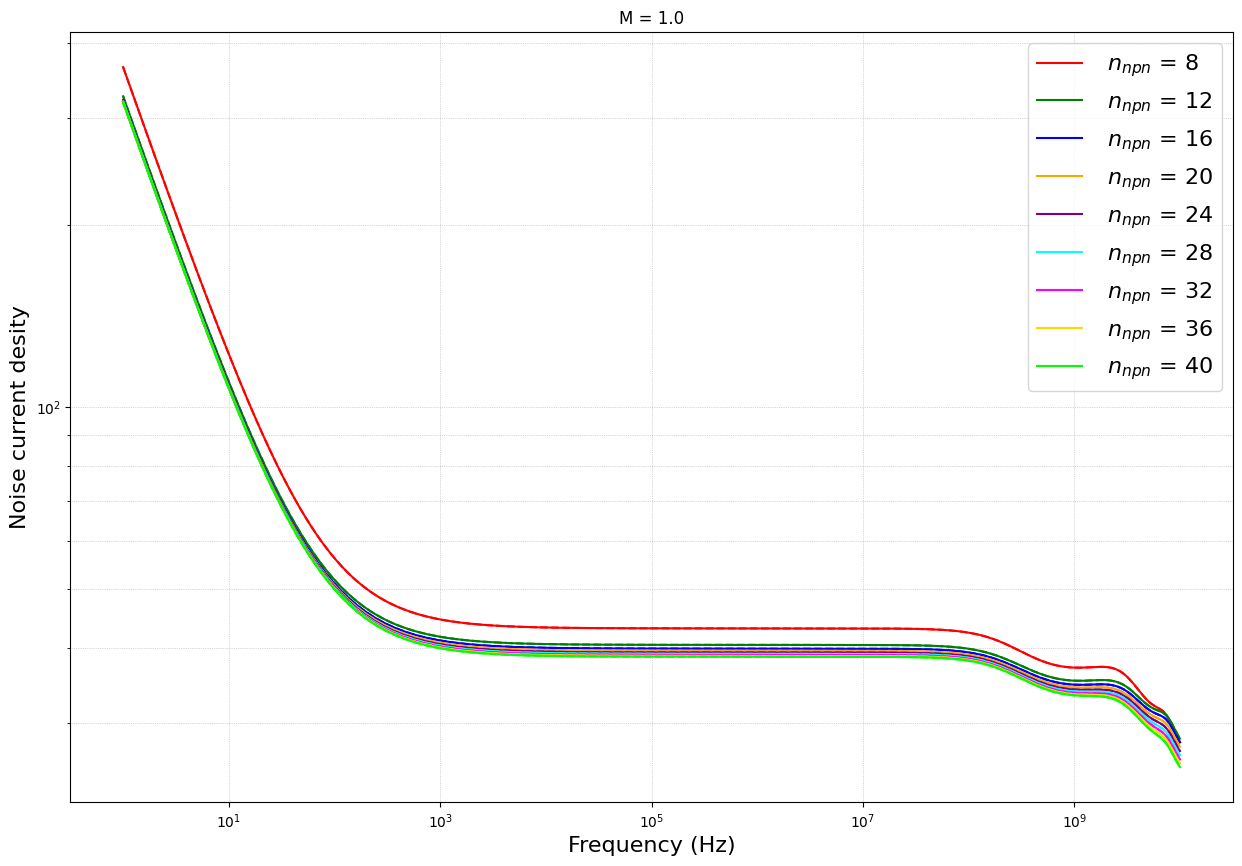

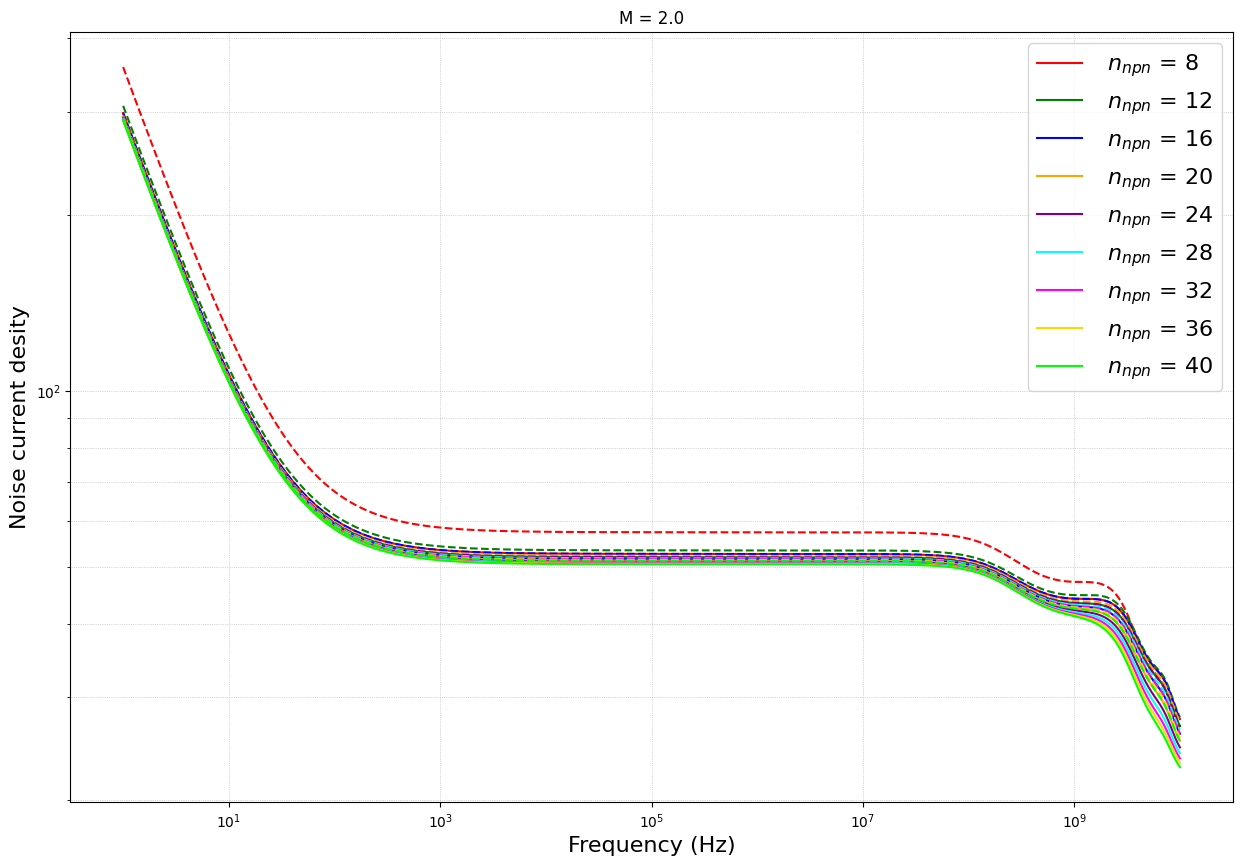

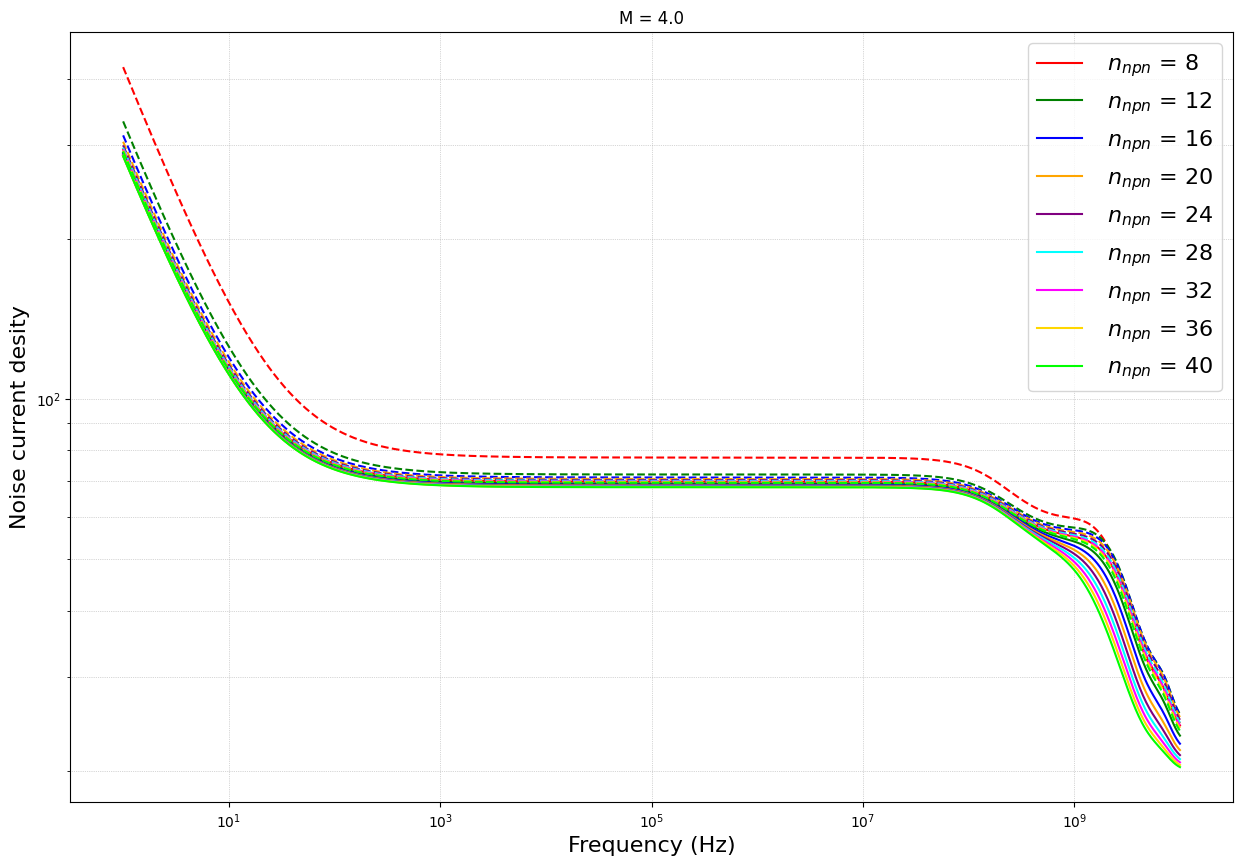

In [286]:
colors = [
    'red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'gold', 'lime'
]
for i in range(5):
    plt.figure(figsize = (15,10))
    plt.title(f'M = {M[i]}')
    for j in range(0,9):
        # plt.semilogx(noise_1[0], M_add1[i][j]/M_add1[i][1], color = colors[j],  label = r' $n_{npn}$ = %.0d' %(nnpn[j]))
        # plt.semilogx(noise_2[0], M_add2[i][j]/M_add2[i][1], color = colors[j], linestyle ='dashed')
        plt.loglog(noise_1[0], M_add1[i][j]*1e12, color = colors[j],  label = r' $n_{npn}$ = %.0d' %(nnpn[j]))
        plt.loglog(noise_2[0], M_add2[i][j]*1e12, color = colors[j], linestyle ='dashed')
    plt.grid(which='both', linestyle=':', linewidth='0.5')
    plt.ylabel(r'Noise current desity', fontsize=16)
    plt.xlabel('Frequency (Hz)', fontsize=16)
    plt.legend(fontsize = 16)
    note =  '| (1:M): straigh line | (1/M:1): dashed line |'
    # plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 
    

### compare in fraction of noise variation 

Observe the variation in white noise region (f = 10MHz) and low noise region (f = 1 Hz) 

In [287]:
#1 Hz 
noise1Hz_1 = [[],[],[],[],[]]
noise10MHz_1 = [[],[],[],[],[]]
noise1Hz_2 = [[],[],[],[],[]]
noise10MHz_2 = [[],[],[],[],[]]
for i in range(5):
    for j in range(9):
        noise1Hz_1[i].append(M_add1[i][j][1])
        noise10MHz_1[i].append(M_add1[i][j][800])
        noise1Hz_2[i].append(M_add2[i][j][1])
        noise10MHz_2[i].append(M_add2[i][j][800])

Text(0.5, 1.0, 'Noise current density measured at 1Hz')

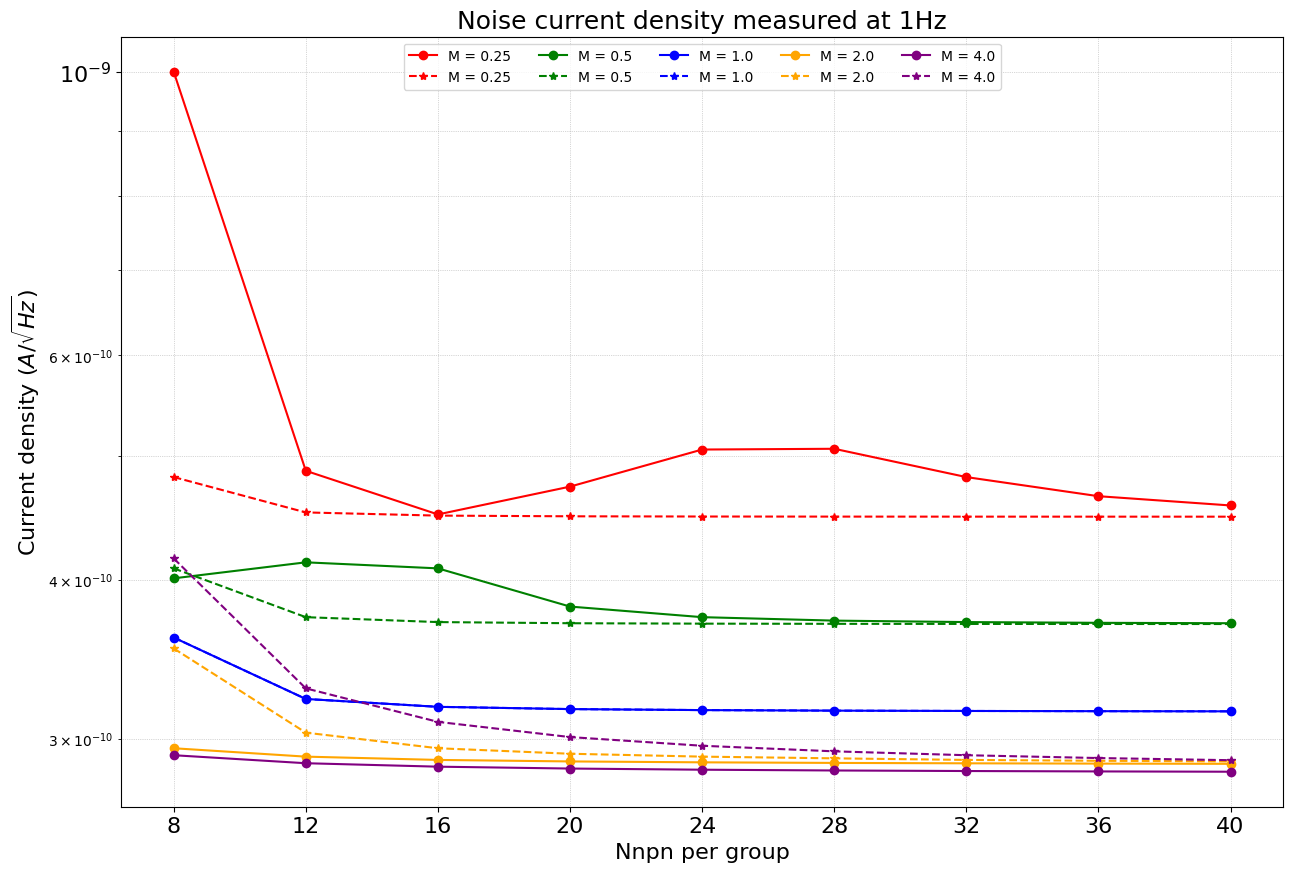

In [288]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.semilogy(nnpn, noise1Hz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.semilogy(nnpn, noise1Hz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(nnpn,fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 1Hz',fontsize = 18)
# note =  '| (1:M): straigh line | (1/M:1): dashed line |'
# plt.figtext(0.5, 1, note , ha="center", fontsize=16, va="bottom") 

Text(0.5, 1.0, 'Noise current density measured at 10MHz')

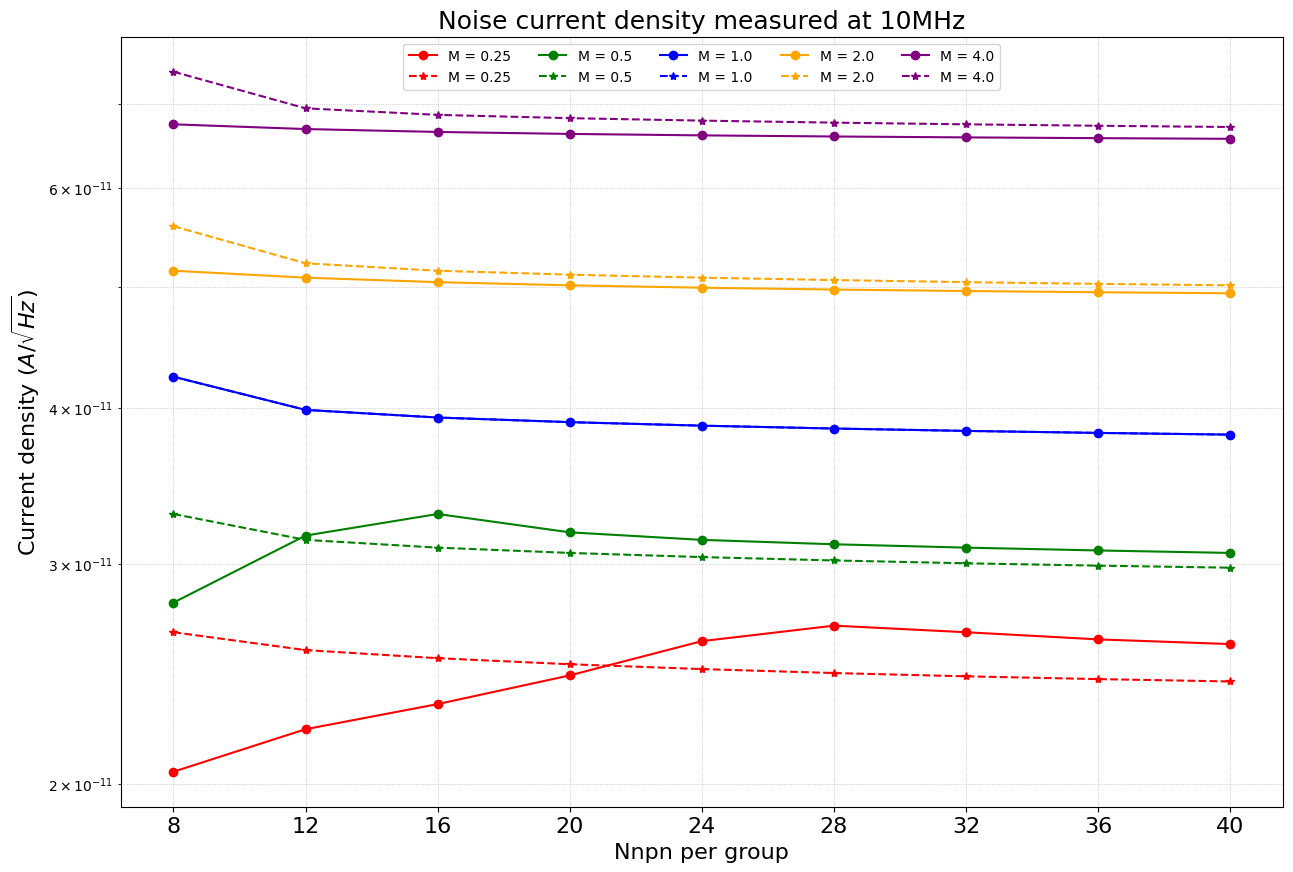

In [289]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.semilogy(nnpn, noise10MHz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.semilogy(nnpn, noise10MHz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)

In [290]:
n_plot1Hz_1 = [[],[],[],[],[],[],[],[],[]]
n_plot1Hz_2 = [[],[],[],[],[],[],[],[],[]]
n_plot10MHz_1 = [[],[],[],[],[],[],[],[],[]]
n_plot10MHz_2 = [[],[],[],[],[],[],[],[],[]]
# noise1Hz_1
# noise1Hz_2
for i in range(5):  # Loop through the outer lists (5 of them)
    for j in range(9):  # Loop through the inner lists (9 of them)
        n_plot1Hz_1[j].append(noise1Hz_1[i][j])
        n_plot1Hz_2[j].append(noise1Hz_2[i][j]) 
        n_plot10MHz_1[j].append(noise10MHz_1[i][j])
        n_plot10MHz_2[j].append(noise10MHz_2[i][j])

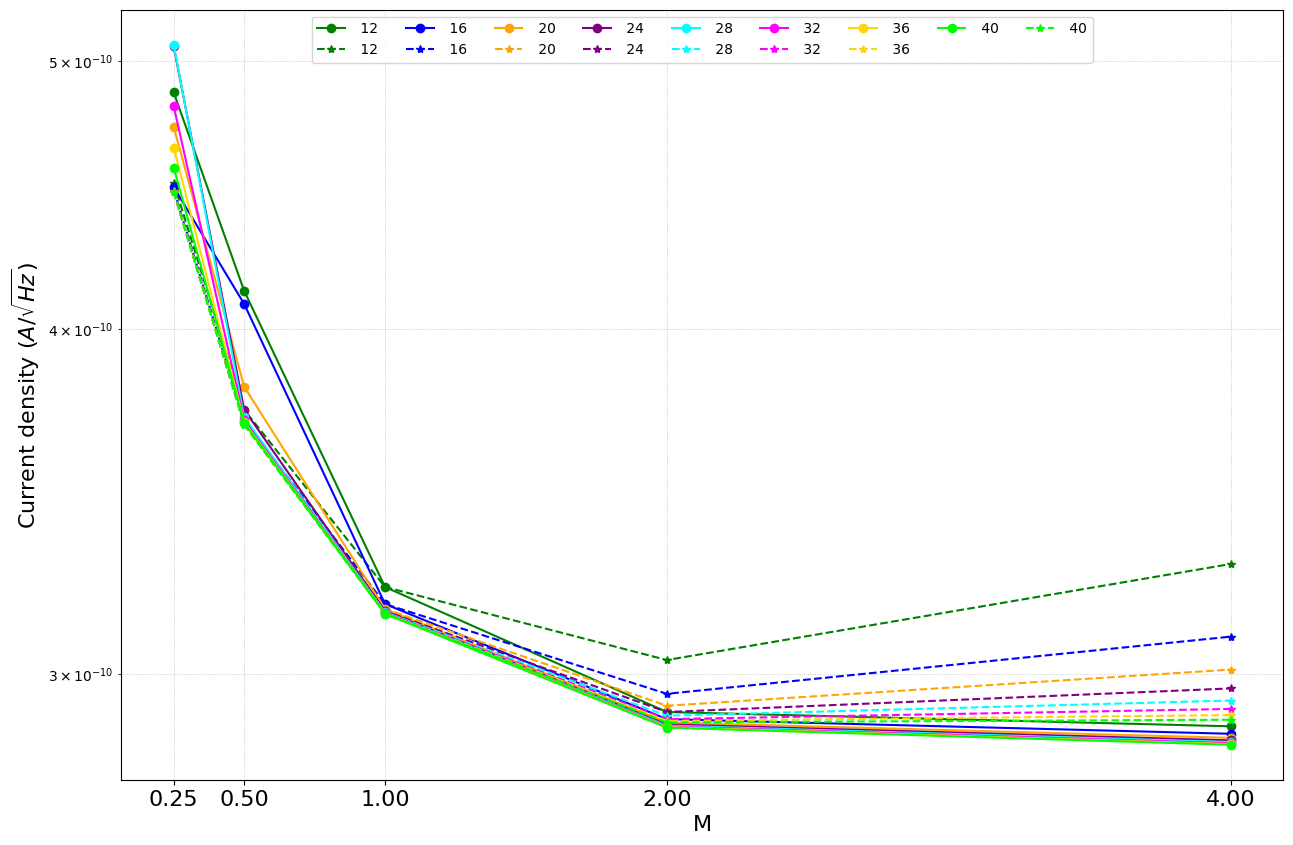

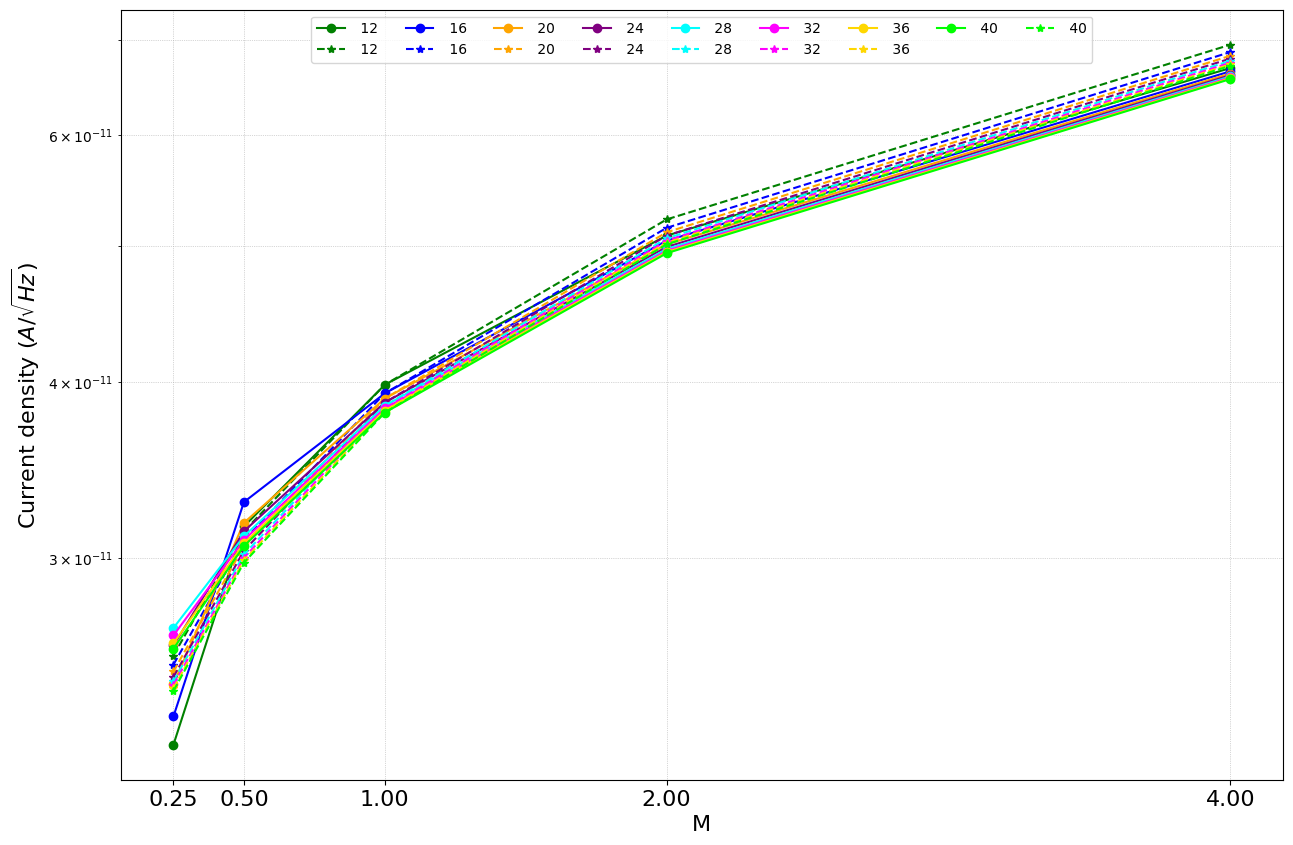

In [291]:
plt.figure(figsize = (15,10))
for i in range(1,9):
    plt.semilogy(M, n_plot1Hz_1[i],color = colors[i], marker = 'o', label = r' %d' %nnpn[i])
    plt.semilogy(M, n_plot1Hz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = r' %d' %nnpn[i])
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('M', fontsize=16)
plt.xticks(M, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=9, bbox_to_anchor=(0.5, 1.0)) 
plt.figure(figsize = (15,10))
for i in range(1,9):
    plt.semilogy(M, n_plot10MHz_1[i],color = colors[i], marker = 'o', label = r' %d' %nnpn[i])
    plt.semilogy(M, n_plot10MHz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = r' %d' %nnpn[i])
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('M', fontsize=16)
plt.xticks(M, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=9, bbox_to_anchor=(0.5, 1.0)) 

### Analytical 


In [ ]:
# Collector current measured from the simulation 


In [292]:
Iout = 1e-3 #A
 
q = 1.6e-19 #C

def white_noise1(M, Iout):
    Iref = Iout/M
    # return np.sqrt(3*(np.sqrt(M*2*q*Iout))**2 + 2*q*Iout)
    return np.sqrt(2*q*Iout*(3 * M + 1))
wn_analytic = white_noise1(M, Iout)
def white_noise_schema(Iref, Ix Iout):
    return np.sqrt(2*q*((Iout/Iref)**2*(Iref + 2*Ix) + Iout)) 
wn_analytic = white_noise1(M, Iout)

[2.36643191e-11 2.82842712e-11 3.57770876e-11 4.73286383e-11
 6.44980620e-11]


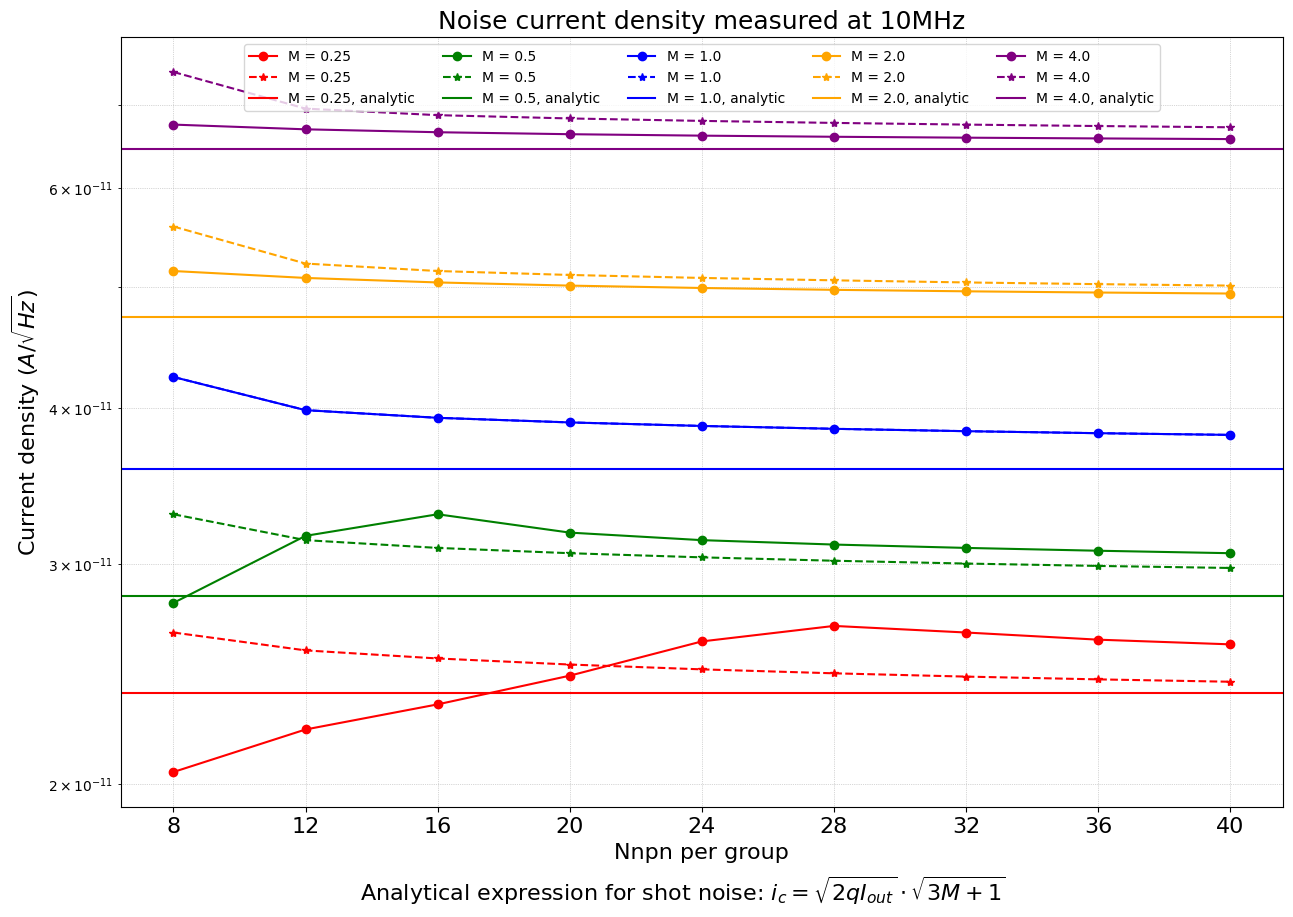

In [293]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.semilogy(nnpn, noise10MHz_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.semilogy(nnpn, noise10MHz_2[i],color = colors[i], marker = '*', linestyle = 'dashed', label = f'M = {M[i]}')
    plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')

plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($A/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel('Nnpn per group', fontsize=16)
plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density measured at 10MHz',fontsize = 18)
note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
plt.savefig('noise10MHz.png')

### Calculate surface area

In [144]:
Spnp = 9.49 * 8.5 #um^2 (can touch btrench?)
Snpn = 5.7 * 4.49 #um^2 doesn't count the infusion
def S1(M, nnpn):
    return 88 * Spnp * 2 +   nnpn * Snpn + M * nnpn * Snpn
def S2(M, nnpn):
    return 88 * Spnp * 2 +   nnpn * Snpn / M +  nnpn * Snpn

In [145]:
#calculate the surface area 
A1 = [[],[],[],[],[]]
A2 = [[],[],[],[],[]]
for i in range(5):
    for j in range(9):
        A1[i].append(S1(M[i], nnpn[j]))
        A2[i].append(S2(M[i], nnpn[j]))
        

Text(0.5, 0.01, '| (1:M): $\\bullet$ | (1/M:1): $\\blacktriangle$ |')

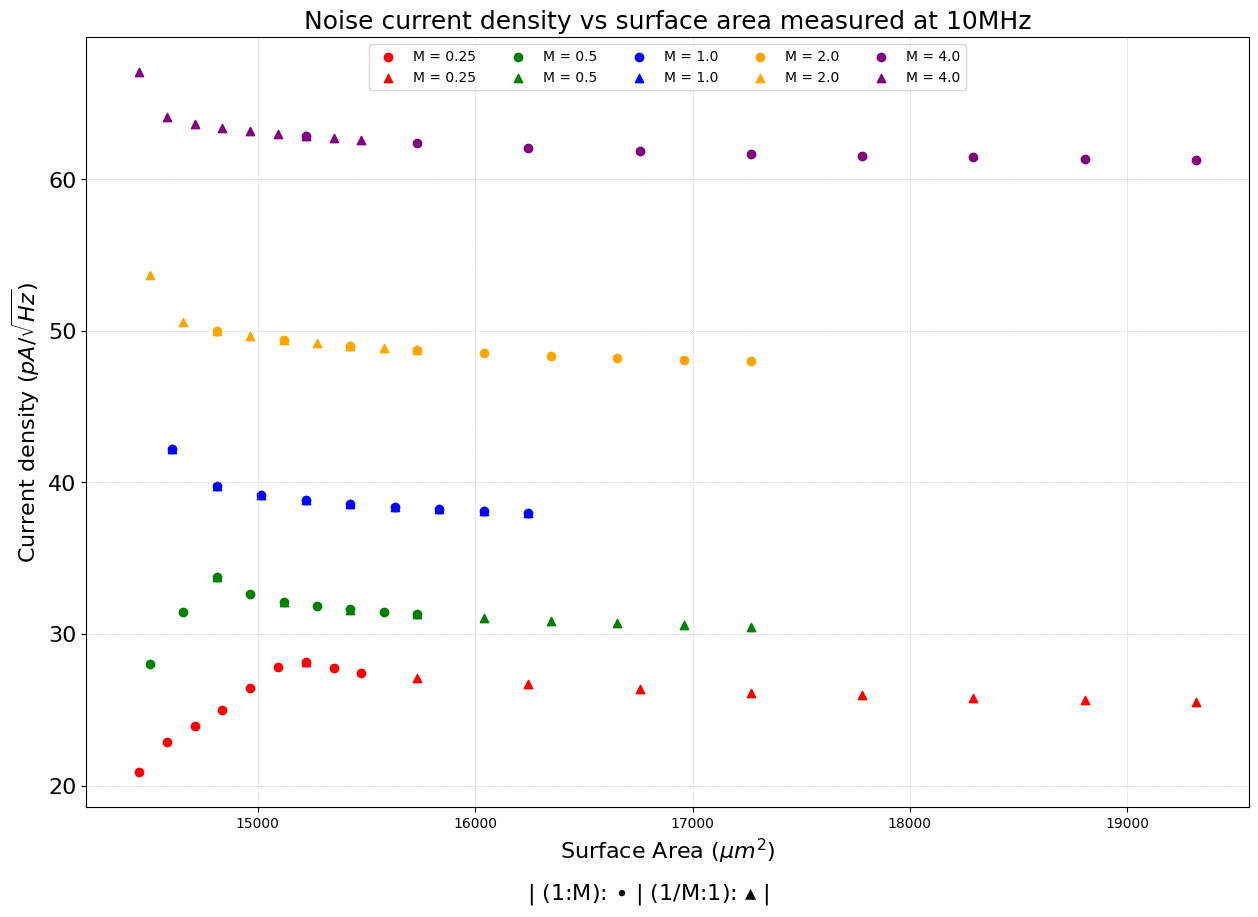

In [146]:
#scatter plot? 

plt.figure(figsize = (15,10))
for i in range(5):
    plt.scatter(A1[i], np.array(noise10MHz_1[i])*1e12,color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], np.array(noise10MHz_2[i])*1e12,color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.0)) 
plt.title('Noise current density vs surface area measured at 10MHz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

Text(0.5, 0.01, '| (1:M): $\\bullet$ | (1/M:1): $\\blacktriangle$ |')

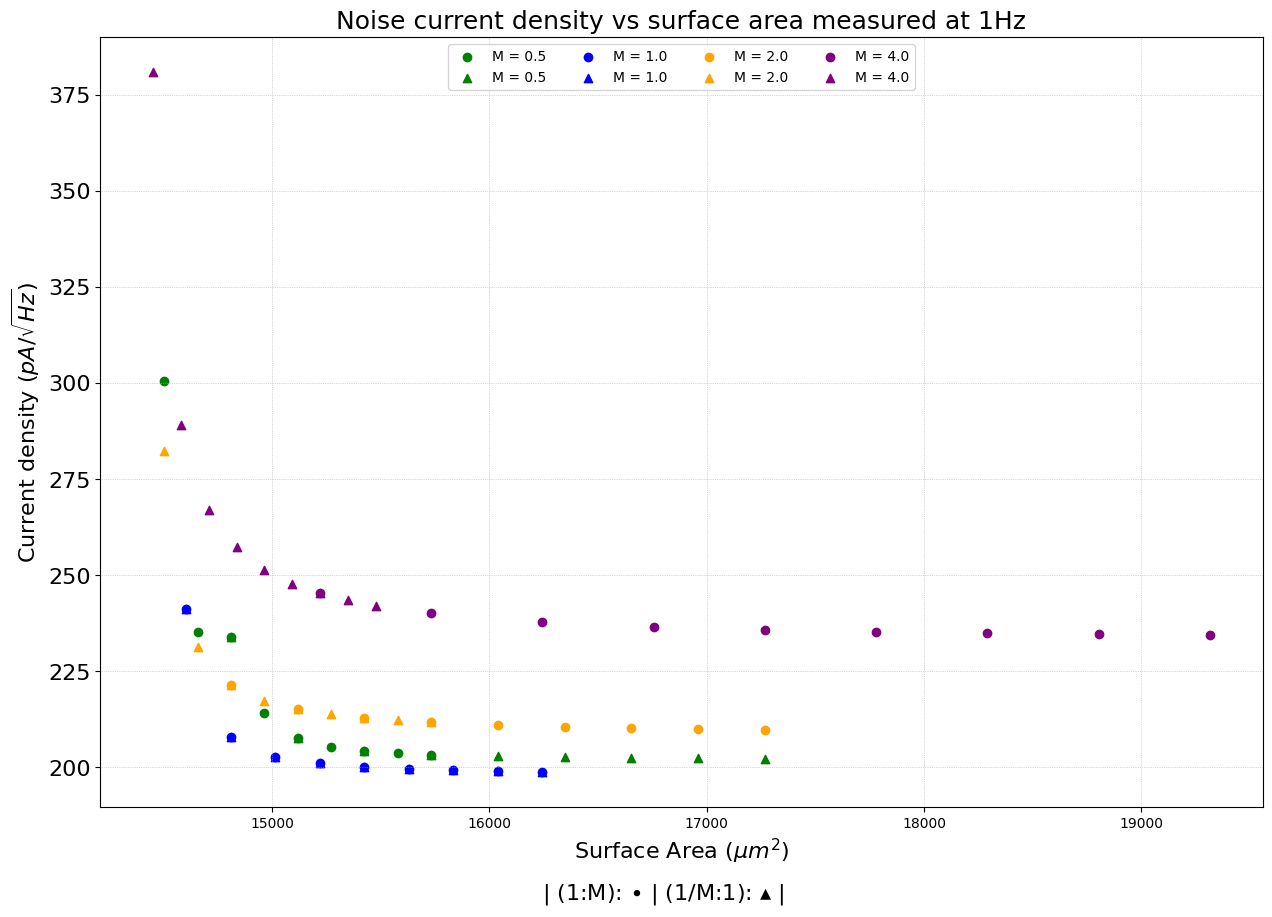

In [147]:
plt.figure(figsize = (15,10))
for i in range(1,5):
    plt.scatter(A1[i], np.array(noise1Hz_1[i])*1e12,color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], np.array(noise1Hz_2[i])*1e12,color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'Current density ($pA/ \sqrt{Hz}$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1)) 
plt.title('Noise current density vs surface area measured at 1Hz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

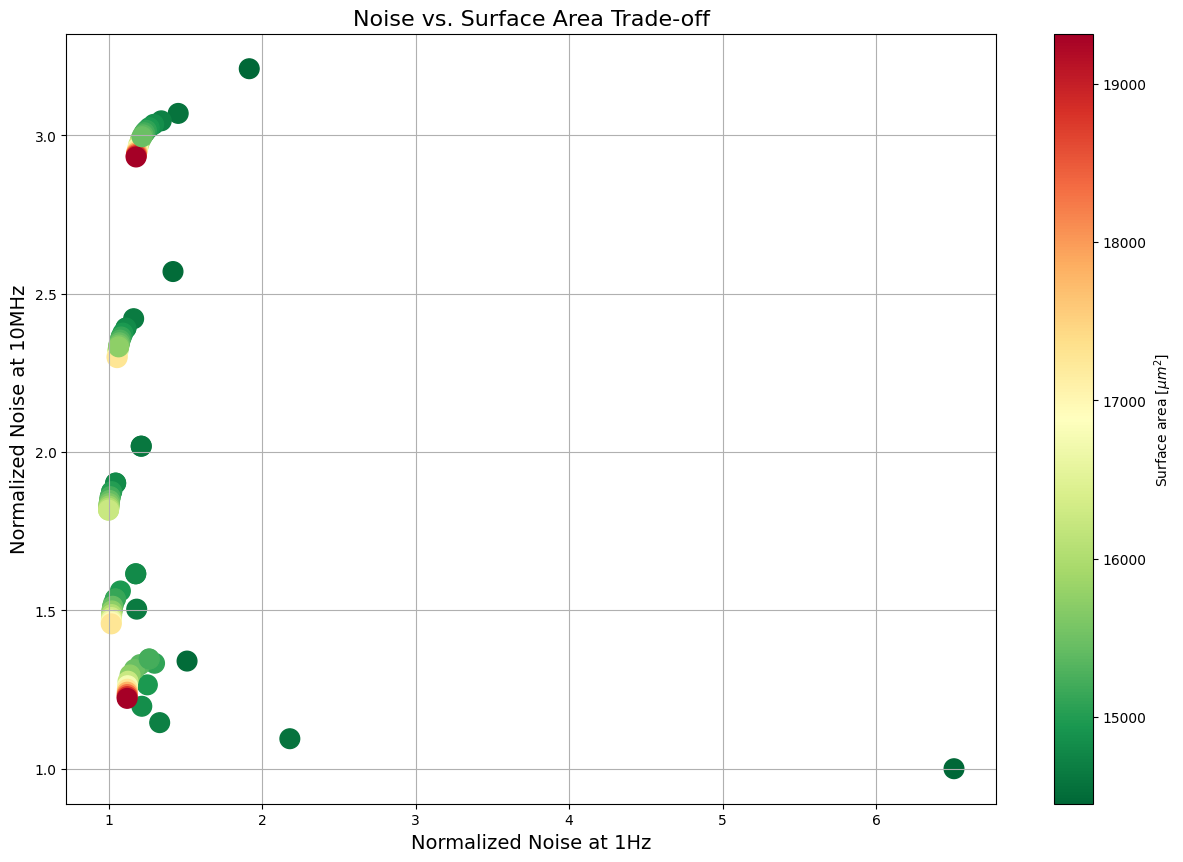

Ranked Data:
The best-ranked solution is at index: 53
Rank 1 (Index: 53): Noise 1Hz = 2.23e+02 pA/sqrt(Hz), Noise 10MHz = 2.55e+01 pA/sqrt(Hz)
Rank 2 (Index: 52): Noise 1Hz = 2.23e+02 pA/sqrt(Hz), Noise 10MHz = 2.56e+01 pA/sqrt(Hz)
Rank 3 (Index: 51): Noise 1Hz = 2.23e+02 pA/sqrt(Hz), Noise 10MHz = 2.58e+01 pA/sqrt(Hz)
Rank 4 (Index: 50): Noise 1Hz = 2.23e+02 pA/sqrt(Hz), Noise 10MHz = 2.59e+01 pA/sqrt(Hz)
Rank 5 (Index: 49): Noise 1Hz = 2.23e+02 pA/sqrt(Hz), Noise 10MHz = 2.61e+01 pA/sqrt(Hz)
Rank 6 (Index: 48): Noise 1Hz = 2.23e+02 pA/sqrt(Hz), Noise 10MHz = 2.64e+01 pA/sqrt(Hz)
Rank 7 (Index: 47): Noise 1Hz = 2.24e+02 pA/sqrt(Hz), Noise 10MHz = 2.67e+01 pA/sqrt(Hz)
Rank 8 (Index: 3): Noise 1Hz = 2.42e+02 pA/sqrt(Hz), Noise 10MHz = 2.50e+01 pA/sqrt(Hz)
Rank 9 (Index: 46): Noise 1Hz = 2.27e+02 pA/sqrt(Hz), Noise 10MHz = 2.71e+01 pA/sqrt(Hz)
Rank 10 (Index: 62): Noise 1Hz = 2.02e+02 pA/sqrt(Hz), Noise 10MHz = 3.05e+01 pA/sqrt(Hz)
Rank 11 (Index: 2): Noise 1Hz = 2.65e+02 pA/sqrt(Hz), No

In [148]:
# Sample data (flatten data)
noise_1Hz = [noise1Hz_1, noise1Hz_2]
noise_1Hz = np.array(noise_1Hz).flatten() 

noise_10MHz = [noise10MHz_1, noise10MHz_2]
noise_10MHz = np.array(noise_10MHz).flatten()

area = [A1,A2]
area = np.array(area).flatten()

# Normalize the data
noise_1Hz_norm = noise_1Hz / np.min(noise_1Hz)
noise_10MHz_norm = noise_10MHz / np.min(noise_10MHz)
area_norm = area / np.min(area)

# Weights (adjust these based on your priorities)
w1 = 0.5  # Weight for noise at 1Hz   (we focuse on flicker noise)
w2 = 0.5  # Weight for noise at 10MHz 
# w3 = 0.3  # Weight for surface area

# Calculate the combined metric (weighted sum)
combined_metric = w1 * noise_1Hz_norm + w2 * noise_10MHz_norm

# Rank the data points (lower is better)
rank_indices = np.argsort(combined_metric)
ranked_noise_1Hz = noise_1Hz[rank_indices]
ranked_noise_10MHz = noise_10MHz[rank_indices]
# ranked_area = area[rank_indices]
# ranked_metric = combined_metric[rank_indices]

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(noise_1Hz_norm, noise_10MHz_norm, c=area, cmap='RdYlGn_r', s=200)
plt.colorbar(scatter, label=r'Surface area [$\mu m^2$] ')
plt.xlabel('Normalized Noise at 1Hz', fontsize=14)
plt.ylabel('Normalized Noise at 10MHz', fontsize=14)
plt.title('Noise vs. Surface Area Trade-off', fontsize=16)

# Annotate points with rank, surface area, and original index
for i, txt in enumerate(ranked_area):
    original_index = rank_indices[i]  # Get the original index
    # plt.annotate(f'{i+1} ({original_index})', 
                 # (noise_1Hz_norm[original_index], noise_10MHz_norm[original_index]), 
                 # textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
plt.savefig('Noise_optimize.png')
plt.show()

# Print ranked data with original index
print("Ranked Data:")
best_index = rank_indices[0]  # Get the original index of the best-ranked solution
print(f"The best-ranked solution is at index: {best_index}")

for i in range(len(ranked_metric)):
    original_index = rank_indices[i]
    print(f"Rank {i+1} (Index: {original_index}): Noise 1Hz = {ranked_noise_1Hz[i]*1e12:.2e} pA/sqrt(Hz), Noise 10MHz = {ranked_noise_10MHz[i]*1e12:.2e} pA/sqrt(Hz)")


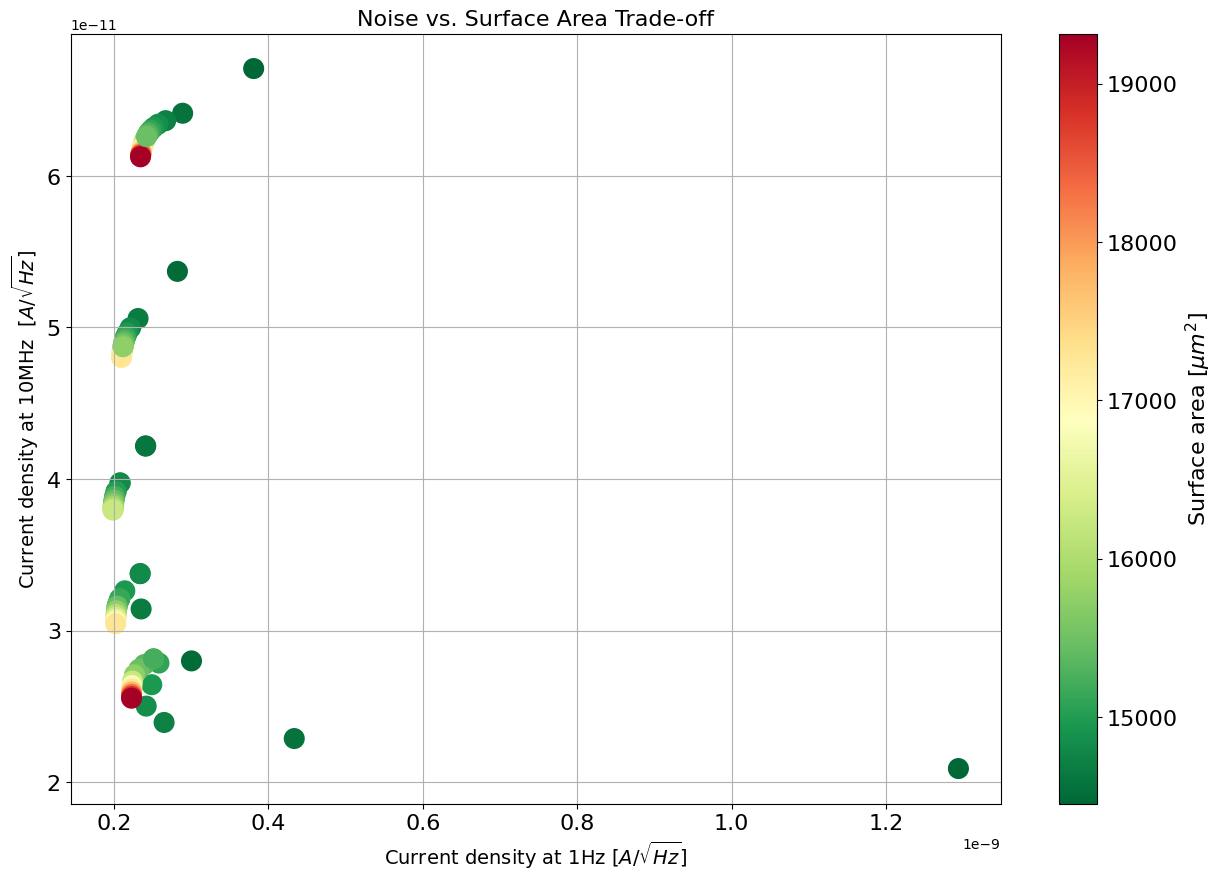

In [149]:
plt.figure(figsize = (15,10))
# plt.scatter(noise_1Hz, noise_10MHz)
scatter = plt.scatter(noise_1Hz, noise_10MHz, c=area, cmap='RdYlGn_r', s=200)
cbar = plt.colorbar(scatter, label=r'Surface area [$\mu m^2$]')
cbar.ax.tick_params(labelsize=16)  # Set the font size of the colorbar ticks
cbar.ax.set_ylabel(r'Surface area [$\mu m^2$]', fontsize=16)  # Set the font size of the colorbar label
plt.xlabel(r'Current density at 1Hz [$A/\sqrt{Hz}$]', fontsize=14)
plt.ylabel('Current density at 10MHz  [$A/\sqrt{Hz}$]', fontsize=14)
plt.title('Noise vs. Surface Area Trade-off', fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
# plt.xlim(1,2)
plt.grid(True)
plt.savefig('Noise_optimize.png')

In [150]:
# noise_square_1 = noise_1
# noise_square_2 = noise_2
# for i in range(1,45):
#     noise_square_1[i] = noise_square_1[i]**2
#     noise_square_2[i] = noise_square_2[i]**2
# print(noise_square_1)

In [151]:
def integral(frequency, data):
    S = 0
    for i in range(1,len(frequency)):
        S = S + 0.5 * (data[i-1]**2 + data[i]**2) * (frequency[i] - frequency[i-1])
    return S 


In [152]:
RMS_1 = [[],[],[],[],[]] 
RMS_2 = [[],[],[],[],[]]
#we want to limit the bw from 1 to 1000


for i in range(5):
    for j in range(9):
        try:
            index = 1 + i + j * 5  # Calculate the index directly
            RMS_1[i].append(integral(noise_1[0][0:300],noise_1[index][0:300]))
            RMS_2[i].append(integral(noise_1[0][0:300],noise_2[index][0:300]))
        except IndexError:
            print(f"Error: Index {index} out of range for noise_1")
            break

In [153]:
RMS = np.array([RMS_1,RMS_2]).flatten()

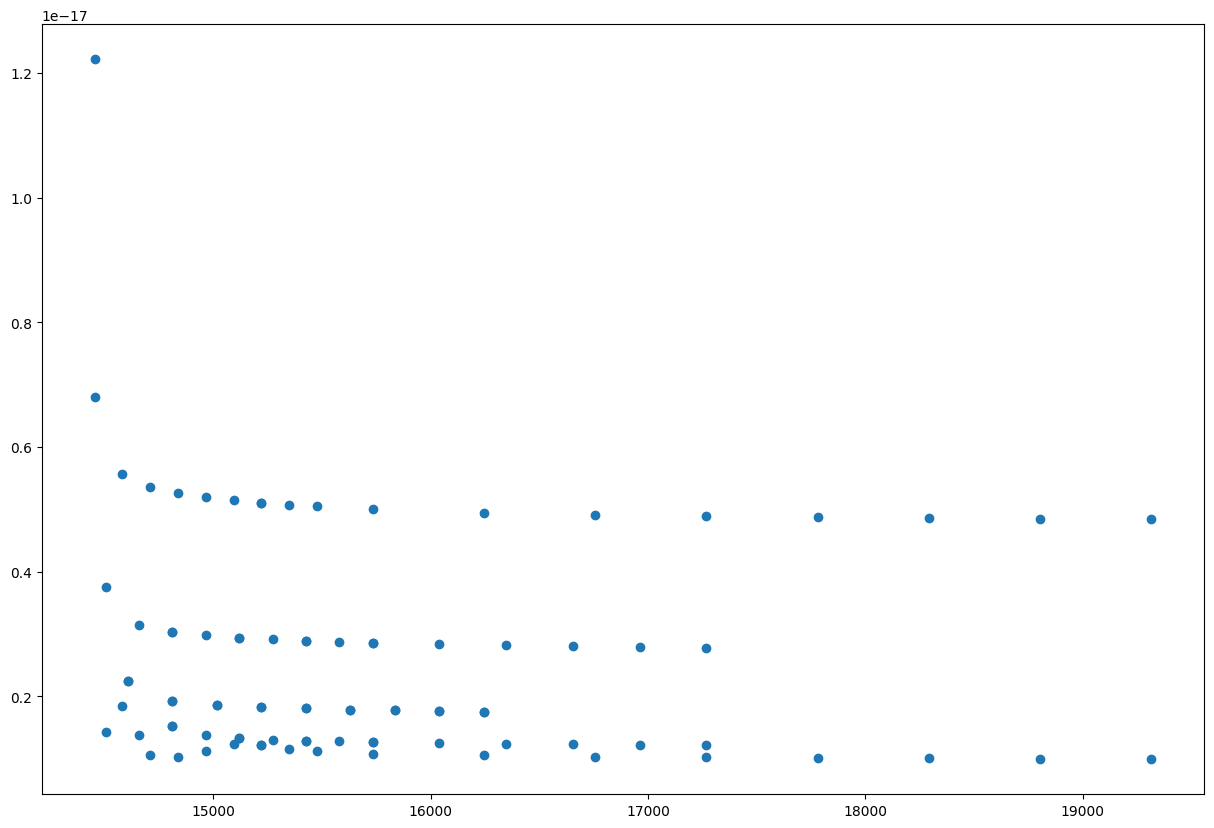

In [154]:
plt.figure(figsize = (15,10))
plt.scatter(area, RMS)

Text(0.5, 0.01, '| (1:M): $\\bullet$ | (1/M:1): $\\blacktriangle$ |')

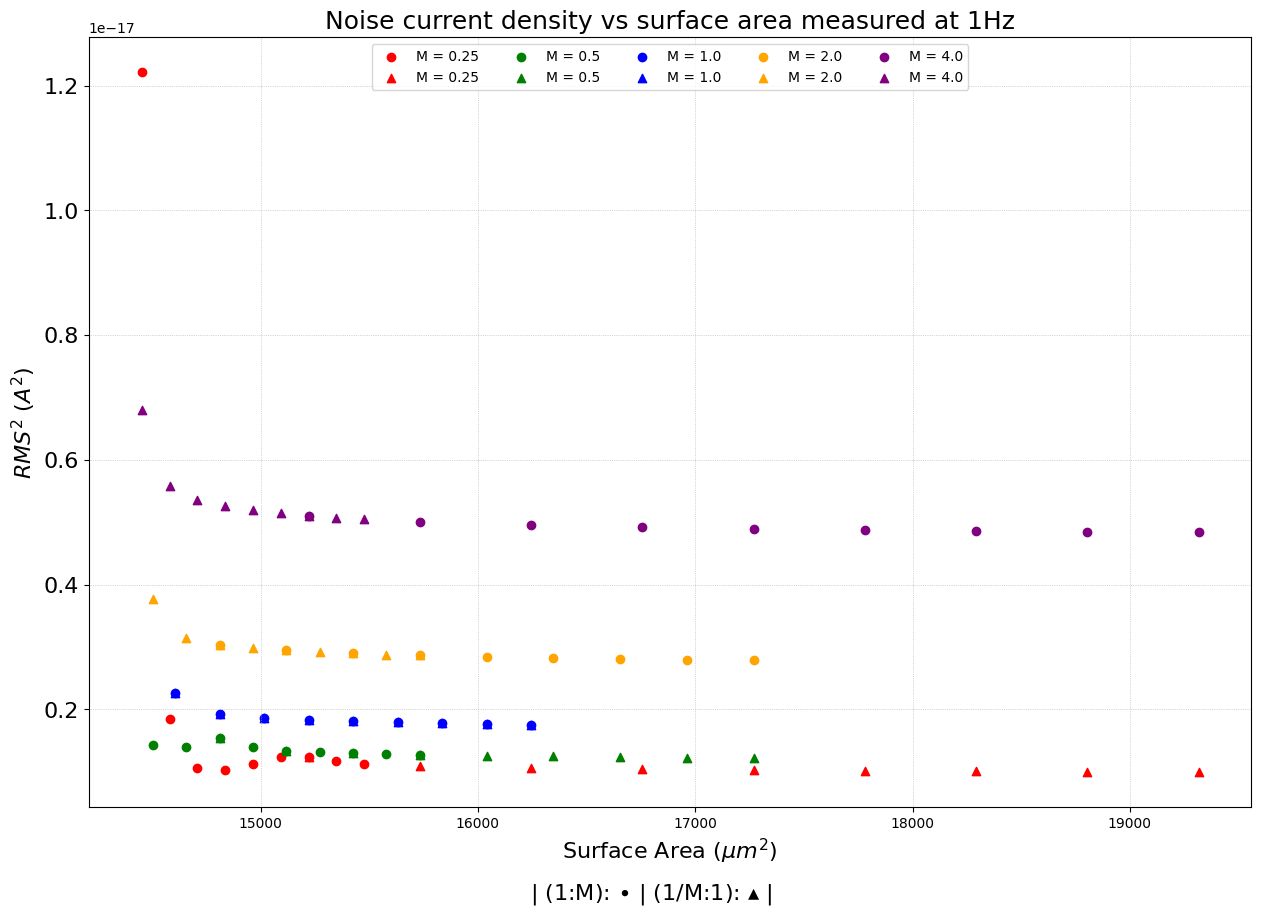

In [155]:
plt.figure(figsize = (15,10))
for i in range(5):
    plt.scatter(A1[i], RMS_1[i],color = colors[i], marker = 'o', label = f'M = {M[i]}')
    plt.scatter(A2[i], RMS_2[i],color = colors[i], marker = "^",  label = f'M = {M[i]}')
    # plt.axhline(y = white_noise1(M[i], Iout), color = colors[i], marker = ',', label = f'M = {M[i]}, analytic')
plt.grid(which='both', linestyle=':', linewidth='0.5')
plt.ylabel(r'$RMS^2$ ($A^2$)', fontsize=16)
plt.xlabel(r'Surface Area $(\mu m^2)$', fontsize=16)
# plt.xticks(nnpn, fontsize = 16)
plt.yticks(fontsize = 16)
# plt.legend(fontsize = 16, loc = 'upper right')
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1)) 
plt.title('Noise current density vs surface area measured at 1Hz',fontsize = 18)
# # note = r'Analytical expression for shot noise: $i_c = \sqrt{2qI_{out}} \cdot \sqrt{3M + 1}$'  # Corrected LaTeX
# plt.figtext(0.5, 0.01, note, ha="center", fontsize=16, va="bottom")
note =  r'| (1:M): $\bullet$ | (1/M:1): $\blacktriangle$ |'
plt.figtext(0.5, 0.01, note , ha="center", fontsize=16, va="bottom") 

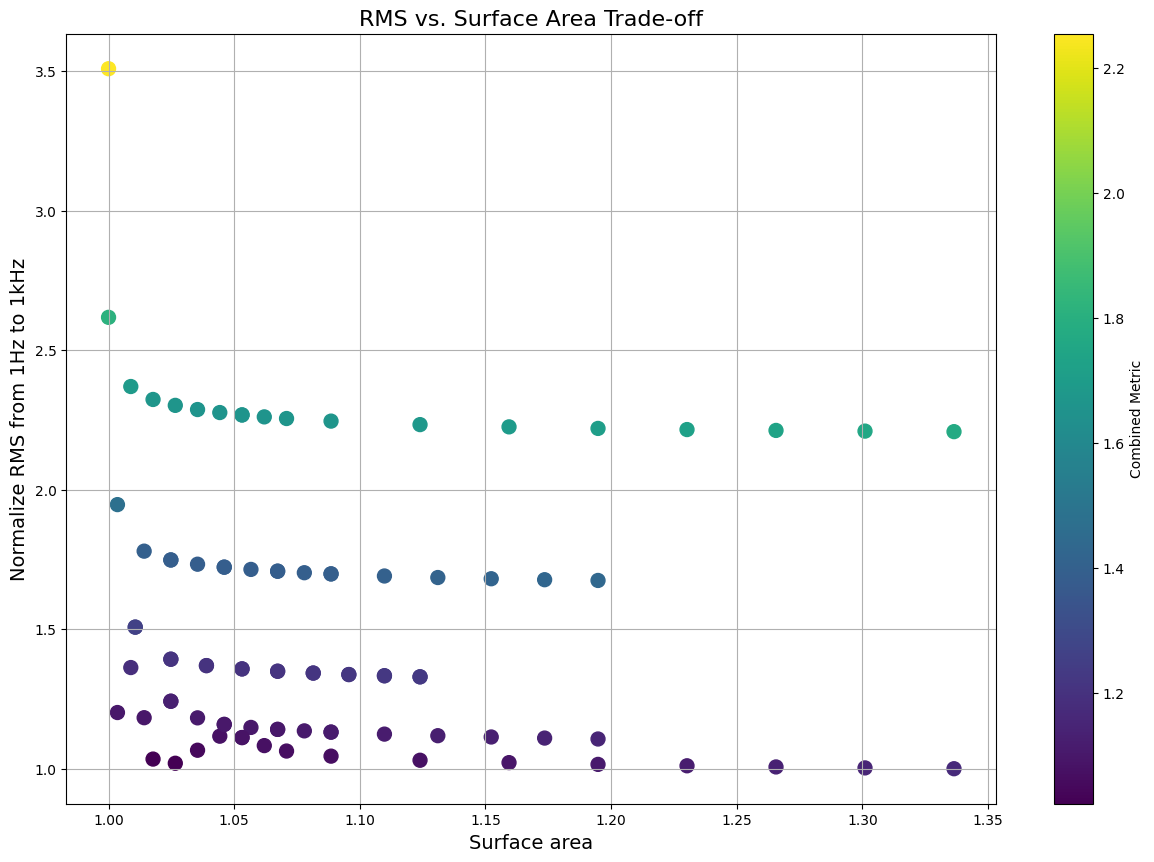

Ranked Data:
The best-ranked solution is at index: 3
Rank 1 (Index: 3): RMS = 1.02e-09 A, normalise_RMS = 1.02e+00, Area = 14836.9 um^2, normalised area = 1.0
Rank 2 (Index: 2): RMS = 1.03e-09 A, normalise_RMS = 1.03e+00, Area = 14708.9 um^2, normalised area = 1.0
Rank 3 (Index: 4): RMS = 1.06e-09 A, normalise_RMS = 1.07e+00, Area = 14964.8 um^2, normalised area = 1.0
Rank 4 (Index: 46): RMS = 1.04e-09 A, normalise_RMS = 1.05e+00, Area = 15732.6 um^2, normalised area = 1.1
Rank 5 (Index: 8): RMS = 1.06e-09 A, normalise_RMS = 1.06e+00, Area = 15476.7 um^2, normalised area = 1.1
Rank 6 (Index: 7): RMS = 1.08e-09 A, normalise_RMS = 1.08e+00, Area = 15348.7 um^2, normalised area = 1.1
Rank 7 (Index: 47): RMS = 1.03e-09 A, normalise_RMS = 1.03e+00, Area = 16244.5 um^2, normalised area = 1.1
Rank 8 (Index: 5): RMS = 1.11e-09 A, normalise_RMS = 1.12e+00, Area = 15092.8 um^2, normalised area = 1.0
Rank 9 (Index: 6): RMS = 1.11e-09 A, normalise_RMS = 1.11e+00, Area = 15220.8 um^2, normalised ar

In [156]:
# Normalize the data
RMS = np.sqrt(RMS)
RMS_norm = RMS / np.min(RMS)
# Calculate the combined metric (weighted sum)
w1 = 0.5
w2 = 0.5
combined_metric = w1 * RMS_norm + w2 * area_norm

# Rank the data points (lower is better)
rank_indices = np.argsort(combined_metric)
ranked_RMS = RMS[rank_indices]
ranked_area = area[rank_indices]
ranked_metric = combined_metric[rank_indices]

# Scatter plot with color-coded combined metric
plt.figure(figsize=(15,10))
scatter = plt.scatter(area_norm, RMS_norm, c=combined_metric, cmap='viridis', s=100)
plt.colorbar(scatter, label='Combined Metric')
plt.xlabel('Surface area', fontsize=14)
plt.ylabel('Normalize RMS from 1Hz to 1kHz', fontsize=14)
plt.title('RMS vs. Surface Area Trade-off', fontsize=16)

# Annotate points with rank, surface area, and original index
for i, txt in enumerate(ranked_area):
    original_index = rank_indices[i]  # Get the original index
    plt.annotate(f'{i+1} ({original_index})', 
                 (RMS[original_index], noise_10MHz_norm[original_index]), 
                 textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)
# plt.xlim(1,2)
plt.grid(True)
plt.show()

# Print ranked data with original index
print("Ranked Data:")
best_index = rank_indices[0]  # Get the original index of the best-ranked solution
print(f"The best-ranked solution is at index: {best_index}")

for i in range(len(ranked_metric)):
    original_index = rank_indices[i]
    print(f"Rank {i+1} (Index: {original_index}): RMS = {ranked_RMS[i]:.2e} A, normalise_RMS = {(ranked_RMS[i]/min(RMS)):.2e}, Area = {ranked_area[i]:.1f} um^2, normalised area = {(ranked_area[i]/(min(area))):.1f}")

In [143]:
# to check exactly the case of the index 
def analyze_index(index, M, N):
    """
    Analyzes an index and prints corresponding information based on its value.

    Args:
      index: The input index.
      M: A known array of M values.
      N: A known array of N values.
    """

    index += 1  # Add 1 to the index
    

    if index < 46:
        print("Case 1")
        M_value = M[index // 9]  
        b = index - ((index // 9) * 9)  # Calculate b for Case 1
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')  # Adjust index for nnpn (0-based)
        print(' |                  | ')
        print(' |                  | ')
        print(' |                  | ')
        print('  \|               |/ ')
        print('   |-------|-------|  ')
        print('  /|       |       |\ ')
        print(' |_________|         | ')
        print(' |                   | ')
        print(' |                   | ')
        print(f' |   {nnpn[int(b) - 1]}   :    {int(M_value*nnpn[int(b) - 1])}     | ')
    else:
        print("Case 2")
        M_value = M[(index - 45) // 9]
        b = index - 45 - ((index - 45) // 9) * 9  # Calculate b for Case 2
        print(f'M = {M_value}')
        print(f'nnpn = {nnpn[int(b) - 1]}')  # Adjust index for nnpn (0-based)
        print(' |                   | ')
        print(' |                   | ')
        print(' |                   | ')
        print('  \|               |/ ')
        print('   |-------|-------|  ')
        print('  /|       |       |\ ')
        print(' |_________|         | ')
        print(' |                   | ')
        print(' |                   | ')
        print(f' |   {int(nnpn[int(b) - 1]/M_value)}   :    {nnpn[int(b) - 1]}    | ')
  

analyze_index(2,M,nnpn)

Case 1
M = 0.25
nnpn = 16
 |                  | 
 |                  | 
 |                  | 
  \|               |/ 
   |-------|-------|  
  /|       |       |\ 
 |_________|         | 
 |                   | 
 |                   | 
 |   16   :    4     | 
